### Objective: Assign Lead Score to all propsective leads of X education. Determine Hot leads  and conversion %.

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings("ignore")

### Reading dataset

In [2]:
data=pd.read_csv("Leads.csv")

### Examining data

In [3]:
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
data=data.replace('Select',np.nan)

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Missing values along rows**

In [7]:
data.isnull().all(axis=1).sum()

0

**Missing values along columns**

In [8]:
round(100*data.isnull().sum()/len(data.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Missing value treatment**

In [9]:
#Removing columns with more than 70% null values

In [10]:
data=data.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [11]:
data.astype('object').describe(include='all').loc['unique', :]

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [12]:
#Remove the Customer specific numbers- identification- which will not contribute in analysis

In [13]:
data=data.drop(['Prospect ID','Lead Number'],axis=1)

In [14]:
#Removing the columns with only one type of value,becuase it being same will not make any impact on analysis.

In [15]:
data=data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [16]:
# Inspecting & Treating missing values in column 'Lead Quality'

In [17]:
data['Lead Quality'].isnull().sum()

4767

In [18]:
round(100*(data['Lead Quality'].isnull().sum()/len(data.index)),2)

51.59

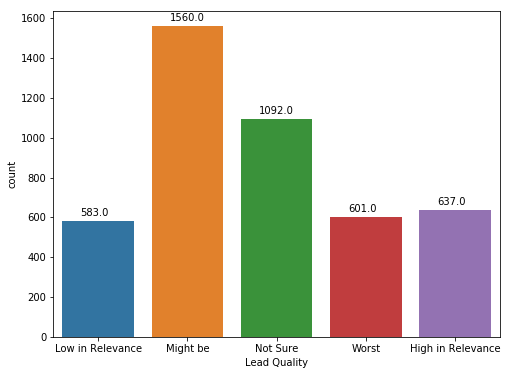

In [19]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(8,6))
ax=sns.countplot(data['Lead Quality'])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+25))
plt.show()

There are more than 50% missing values in 'Lead Quality' column because of no assignment by X Education employee.
We don't have any information about these missing fields hence replacing them by 'Unknown'

In [20]:
data['Lead Quality']=data['Lead Quality'].replace(np.nan,"Unknown")

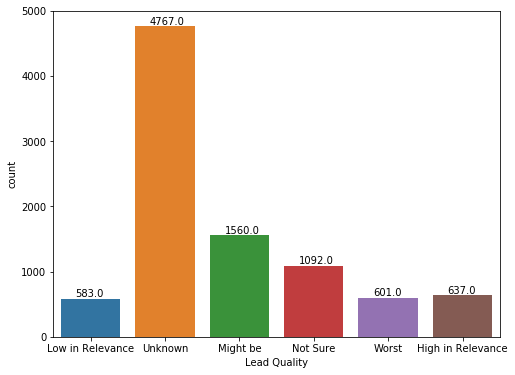

In [21]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(8,6))
ax=sns.countplot(data['Lead Quality'])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+25))
plt.show()

In [22]:
#Inspecting & Treating missing values in 'Asymmetrique Activity Index','Asymmetrique Activity Score' columns

In [23]:
data.pivot_table(index=['Asymmetrique Activity Index','Asymmetrique Activity Score'],values=['Total Time Spent on Website'],aggfunc=['count','mean'])

count  \
                                                        Total Time Spent on Website   
Asymmetrique Activity Index Asymmetrique Activity Score                               
01.High                     16.0                                                467   
                            17.0                                                349   
                            18.0                                                  5   
02.Medium                   13.0                                                775   
                            14.0                                               1771   
                            15.0                                               1293   
03.Low                      7.0                                                   1   
                            8.0                                                   4   
                            9.0                                                   9   
                            10.0                                                 57   
                            11.0                                                 95   
                            12.0                                                196   

                                                                               mean  
                                                        Total Time Spent on Website  
Asymmetrique Activity Index Asymmetrique Activity Score                              
01.High                     16.0                                         498.614561  
                            17.0                                         100.722063  
                            18.0                                         676.800000  
02.Medium                   13.0                                         493.723871  
                            14.0                                         553.280632  
                            15.0                                         544.957463  
03.Low                      7.0                                           91.000000  
                            8.0                                           45.000000  
                            9.0                                          385.777778  
                            10.0                                         338.421053  
                            11.0                                         462.157895  
                            12.0                                         424.423469

In [24]:
#Inspecting & Treating missing values in 'Asymmetrique Profile Index','Asymmetrique Profile Score'

In [25]:
a=data.groupby(['Asymmetrique Profile Index','What is your current occupation','Asymmetrique Profile Score']).count()
a.reset_index(inplace=True)

In [26]:
a[['What is your current occupation','Asymmetrique Profile Index','Asymmetrique Profile Score']]

,What is your current occupation,Asymmetrique Profile Index,Asymmetrique Profile Score
0,Businessman,01.High,18.0
1,Businessman,01.High,19.0
2,Housewife,01.High,19.0
3,Housewife,01.High,20.0
4,Other,01.High,18.0
5,Student,01.High,17.0
6,Student,01.High,18.0
7,Student,01.High,19.0
8,Student,01.High,20.0
9,Unemployed,01.High,17.0


In [27]:
#It can be seen above that 'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index', &
#'Asymmetrique Profile Score' have very high number of null values. Also, there is no visible relation in 
#Profile type and Profile index OR
#User Activity and Activity index/score. Hence Deleteing these four columns.

In [28]:
data=data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

In [29]:
#Inspecting & Treating missing values in column 'City'

In [30]:
round(100*(data.City.isnull().sum()/len(data.index)),2)

39.71

In [31]:
round(100*(data.groupby('City').City.count()/len(data.index)),2)

City
Mumbai                         34.87
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Thane & Outskirts               8.14
Tier II Cities                  0.80
Name: City, dtype: float64

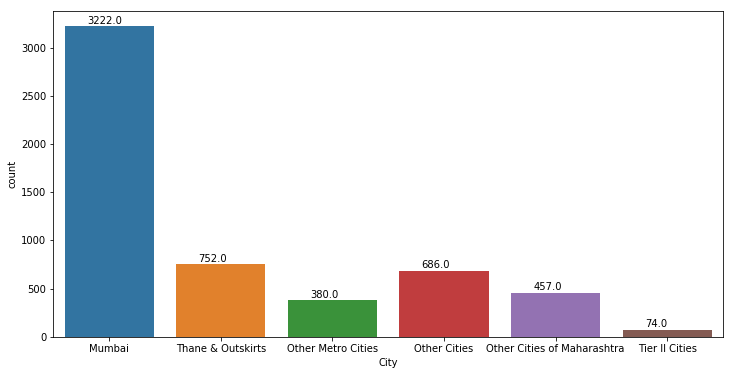

In [32]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(12,6))
ax=sns.countplot(data['City'])
for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+25))
plt.show()

'City' column has ~40% missing values. Maximum occurring value 'Mumbai' is also lesser than missing values at ~35%, hence we can't suitably impute the missing values. Dropping the column 'City' also.

In [33]:
data=data.drop('City',axis=1)

In [34]:
#Inspecting & Treating missing values in 'Tags'

In [35]:
round(100*(data.Tags.isnull().sum()/len(data.index)),2)

36.29

In [36]:
round(100*(data['Tags'].value_counts()/len(data.index)),2)

Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                    0.

Since we don't know what might be the status of missing value 'Tags', it is better to replace them with value 'Unknown'

In [37]:
data['Tags']=data['Tags'].replace(np.nan,'Unknown')

In [38]:
#Inspecting & Treating missing values in 'Specialization'

In [39]:
round(100*(data.Specialization.isnull().sum()/len(data.index)),2)

36.58

In [40]:
round(100*(data['Specialization'].value_counts()/len(data.index)),2)

Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

37% values are missing in 'Specialization' & we don't have any information about those missing value prospects. Hence replacing the null values with 'Other_Specialization'

In [41]:
data['Specialization']=data['Specialization'].replace(np.nan,'Other_Specialization')

In [42]:
#Inspecting & treating missing values in 'Country'

In [43]:
round(100*(data.Country.isnull().sum()/len(data.index)),2)

26.63

In [44]:
round(100*(data['Country'].value_counts()/len(data.index)),2)

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Nigeria                  0.04
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Germany                  0.04
Sweden                   0.03
Belgium                  0.02
Uganda                   0.02
China                    0.02
Netherlands              0.02
Philippines              0.02
Italy                    0.02
Asia/Pacific Region      0.02
Ghana                    0.02
Bangladesh               0.02
Denmark                  0.01
Vietnam                  0.01
Russia                   0.01
Tanzania                 0.01
Sri Lanka                0.01
Kenya     

In 'Country' 70% values are 'India'. Missing values are 26.63%. Because of very high frequency of 'India', imputing missing values with this entry.

In [45]:
data['Country']=data['Country'].replace(np.nan,'India')

In [46]:
#Inspecting & Treating missing values in 'What is your current occupation'

In [47]:
round(100*(data['What is your current occupation'].isnull().sum()/len(data.index)),2)

29.11

In [48]:
round(100*(data['What is your current occupation'].value_counts()/len(data.index)),2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

'What is your current occupation' has ~29% missing values. 60% prospects are Unemployed. But it is unsafe to replace the missing fields with 'Unemployed'
Hence replacing the missing field with 'Other'

In [49]:
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Other')

In [50]:
round(100*(data['What is your current occupation'].value_counts()/len(data.index)),2)

Unemployed              60.61
Other                   29.29
Working Professional     7.64
Student                  2.27
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [51]:
#Inspecting & Treating missing values in 'What matters most to you in choosing a course'

In [52]:
round(100*(data['What matters most to you in choosing a course'].isnull().sum()/len(data.index)),2)

29.32

In [53]:
round(100*(data['What matters most to you in choosing a course'].value_counts()/len(data.index)),2)

Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

70% people are choosing the course for 'Better Career prspects', so it is a suitable choice to replace 29% missing values of the column.

In [54]:
data['What matters most to you in choosing a course']=data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [55]:
round(100*(data['What matters most to you in choosing a course'].value_counts()/len(data.index)),2)

Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [56]:
# After null value replacements, almost all the records for "What matters most to you in choosing a course" are for "Better career prospects"
#Due to lack of variability in this column, it can be safely dropeed.
data=data.drop('What matters most to you in choosing a course',axis=1)

In [57]:
#Inspecting & Treating missing values in 'Lead Source'

In [58]:
round(100*(data['Lead Source'].value_counts()/len(data.index)),2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
youtubechannel        0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
testone               0.01
NC_EDM                0.01
WeLearn               0.01
blog                  0.01
Name: Lead Source, dtype: float64

In [59]:
#Google is appearing twice in different case letters, removing this inconsistency
data['Lead Source']=np.where(data['Lead Source']=="google","Google",data['Lead Source'])

In [60]:
round(100*(data['Lead Source'].value_counts()/len(data.index)),2)

Google               31.09
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
youtubechannel        0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
testone               0.01
NC_EDM                0.01
WeLearn               0.01
blog                  0.01
Name: Lead Source, dtype: float64

In [61]:
#In lead Source column, replacing null values with most occurring value "Google"
data['Lead Source']=data['Lead Source'].replace(np.nan,'Google')

In [62]:
#Inspecting & Treating missing values in 'TotalVisits'

In [63]:
round(100*(data['TotalVisits']/len(data.index)),2).head()

0    0.00
1    0.05
2    0.02
3    0.01
4    0.02
Name: TotalVisits, dtype: float64

In [64]:
#Replacing the missing values of TotalVisits column with 'O' since we can't predict anything about it
data['TotalVisits']=data['TotalVisits'].replace(np.nan,0)

In [65]:
#Inspecting & Treating missing values in 'Page Views Per Visit'

In [66]:
data['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [67]:
#Columns 'Page Views Per Visit' & 'TotalVisits' had same number of missing values. and we replaced the missing values in former with '0'\
#So in '0' visits, page visited will also be '0'
data['Page Views Per Visit']=data['Page Views Per Visit'].replace(np.nan,0)

In [68]:
#Inspecting & Treating missing values in 'Last Activity'

In [69]:
data['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [70]:
round(100*(data['Last Activity'].value_counts()/len(data.index)),2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [71]:
#Replacing the missing values in "Last Activity" column with maximum occurring values "Email Opened"
data['Last Activity']=data['Last Activity'].replace(np.nan,"Email Opened")

In [72]:
round(100*(data['Last Activity'].value_counts()/len(data.index)),2)

Email Opened                    38.31
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [73]:
round(100*data.isnull().sum()/len(data.index),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
Lead Quality                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

In [74]:
#So all the missing values have been treated now

**Treating columns based on value frequency**

In [75]:
data.astype('object').describe(include='all').loc['unique', :]

Lead Origin                                  5
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Country                                     38
Specialization                              19
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        27
Lead Quality                                 6
A free copy of Mastering The Interview       2
Last Notable 

**Checking the column frequencies where only '2' types of values exits.**

In [76]:
round(100*(data['Do Not Email'].value_counts()/len(data.index)),2)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

In [77]:
round(100*(data['Do Not Call'].value_counts()/len(data.index)),2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [78]:
#The column "Do not Call" almost all values "No", hence this column can be safely dropped in absence of variabilty.
data=data.drop('Do Not Call',axis=1)

In [79]:
round(100*(data['Search'].value_counts()/len(data.index)),2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [80]:
round(100*((data.groupby(['Search','Converted']).Converted.count())/len(data.index)),2)

Search  Converted
No      0            61.36
        1            38.48
Yes     0             0.10
        1             0.05
Name: Converted, dtype: float64

In [81]:
round(100*(data['Newspaper Article'].value_counts()/len(data.index)),2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [82]:
round(100*((data.groupby(['Newspaper Article','Converted']).Converted.count())/len(data.index)),2)

Newspaper Article  Converted
No                 0            61.45
                   1            38.53
Yes                0             0.01
                   1             0.01
Name: Converted, dtype: float64

In [83]:
round(100*(data['X Education Forums'].value_counts()/len(data.index)),2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [84]:
round(100*((data.groupby(['X Education Forums','Converted']).Converted.count())/len(data.index)),2)

X Education Forums  Converted
No                  0            61.45
                    1            38.54
Yes                 0             0.01
Name: Converted, dtype: float64

In [85]:
round(100*(data['Newspaper'].value_counts()/len(data.index)),2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [86]:
round(100*((data.groupby(['Newspaper','Converted']).Converted.count())/len(data.index)),2)

Newspaper  Converted
No         0            61.45
           1            38.54
Yes        0             0.01
Name: Converted, dtype: float64

In [87]:
round(100*(data['Digital Advertisement'].value_counts()/len(data.index)),2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [88]:
round(100*((data.groupby(['Digital Advertisement','Converted']).Converted.count())/len(data.index)),2)

Digital Advertisement  Converted
No                     0            61.43
                       1            38.53
Yes                    0             0.03
                       1             0.01
Name: Converted, dtype: float64

In [89]:
round(100*(data['Through Recommendations'].value_counts()/len(data.index)),2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [90]:
round(100*((data.groupby(['Through Recommendations','Converted']).Converted.count())/len(data.index)),2)

Through Recommendations  Converted
No                       0            61.44
                         1            38.48
Yes                      0             0.02
                         1             0.05
Name: Converted, dtype: float64

In [91]:
#It can be seen that people who said "Yes" in above 6 columns is a very very small percentage and the conversion percentage 
#is even smaller. So the field marked "Yes" isn't making any difference.
#Hence it is best to drop these columns in absence of variability.

In [92]:
data=data.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [93]:
round(100*(data['A free copy of Mastering The Interview'].value_counts()/len(data.index)),2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

In [94]:
round(100*((data.groupby(['A free copy of Mastering The Interview','Converted']).Converted.count())/len(data.index)),2)

A free copy of Mastering The Interview  Converted
No                                      0            41.35
                                        1            27.39
Yes                                     0            20.11
                                        1            11.15
Name: Converted, dtype: float64

In [95]:
#The column 'A free copy of Mastering The Interview' represents significant variation, hence shall be kept.

**Examining Structure of cleaned data**

In [96]:
round(100*data.isnull().sum()/len(data.index),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

**Outlier Removal**

In [97]:
round(data.describe(),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.39,487.70,2.33
std,0.49,4.84,548.02,2.16
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,12.00,0.00
50%,0.00,3.00,248.00,2.00
75%,1.00,5.00,936.00,3.00
max,1.00,251.00,2272.00,55.00


**Retaining data within 3*Std. Dev. for each column**

In [98]:
def remove_outlier(df, Data):
        df_out=df[np.abs(df[Data]-df[Data].mean()) <= (3*df[Data].std())]
        return df_out

In [99]:
data=remove_outlier(data,'Total Time Spent on Website')
data=remove_outlier(data,'Page Views Per Visit')

In [100]:
round(data.describe(),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9112.00,9112.00,9112.00,9112.00
mean,0.38,3.28,483.21,2.21
std,0.49,4.67,545.48,1.85
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,9.00,0.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,929.00,3.00
max,1.00,251.00,2125.00,8.50


In [101]:
round(100*(data.Converted.value_counts()/len(data.index)),2)

0    61.51
1    38.49
Name: Converted, dtype: float64

In [102]:
#The data now has 38.49% cases of Conversion.

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9239
Data columns (total 15 columns):
Lead Origin                               9112 non-null object
Lead Source                               9112 non-null object
Do Not Email                              9112 non-null object
Converted                                 9112 non-null int64
TotalVisits                               9112 non-null float64
Total Time Spent on Website               9112 non-null int64
Page Views Per Visit                      9112 non-null float64
Last Activity                             9112 non-null object
Country                                   9112 non-null object
Specialization                            9112 non-null object
What is your current occupation           9112 non-null object
Tags                                      9112 non-null object
Lead Quality                              9112 non-null object
A free copy of Mastering The Interview    9112 non-null object
Last Notabl

**Exploratory data analysis-Univariate & combining values with less frequency into category 'Other' for each column**

In [104]:
data['Lead Origin'].value_counts()

Landing Page Submission    4784
API                        3555
Lead Add Form               718
Lead Import                  55
Name: Lead Origin, dtype: int64

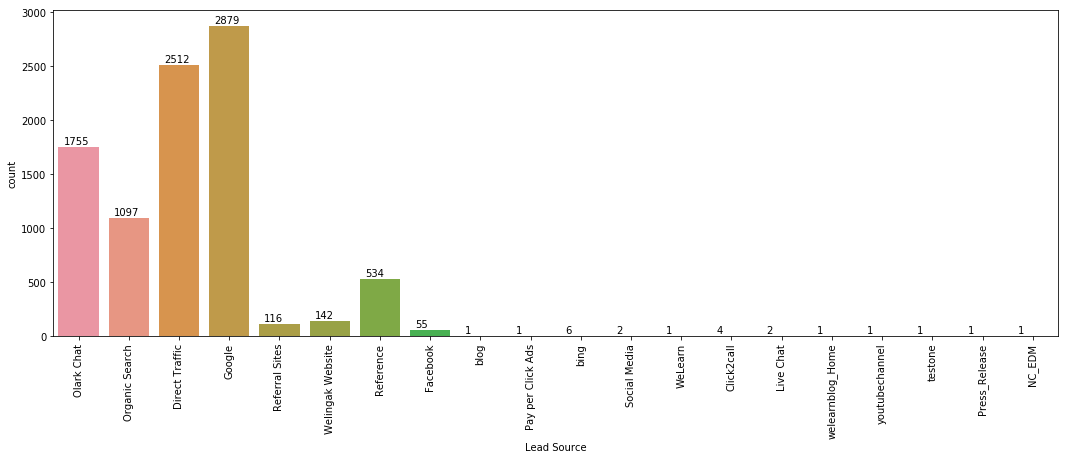

In [105]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(18,6))
ax=sns.countplot(data['Lead Source'])
plt.xticks(rotation=90)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+25))  
plt.show()

In [106]:
round(100*(data['Lead Source'].value_counts()/len(data.index)),2)

Google               31.60
Direct Traffic       27.57
Olark Chat           19.26
Organic Search       12.04
Reference             5.86
Welingak Website      1.56
Referral Sites        1.27
Facebook              0.60
bing                  0.07
Click2call            0.04
Social Media          0.02
Live Chat             0.02
testone               0.01
Press_Release         0.01
Pay per Click Ads     0.01
youtubechannel        0.01
welearnblog_Home      0.01
NC_EDM                0.01
WeLearn               0.01
blog                  0.01
Name: Lead Source, dtype: float64

In [107]:
#Replacing the values which are less than 1% with "Others"

In [108]:
data['Lead Source']=data['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM','Facebook'],'Other_Sources')

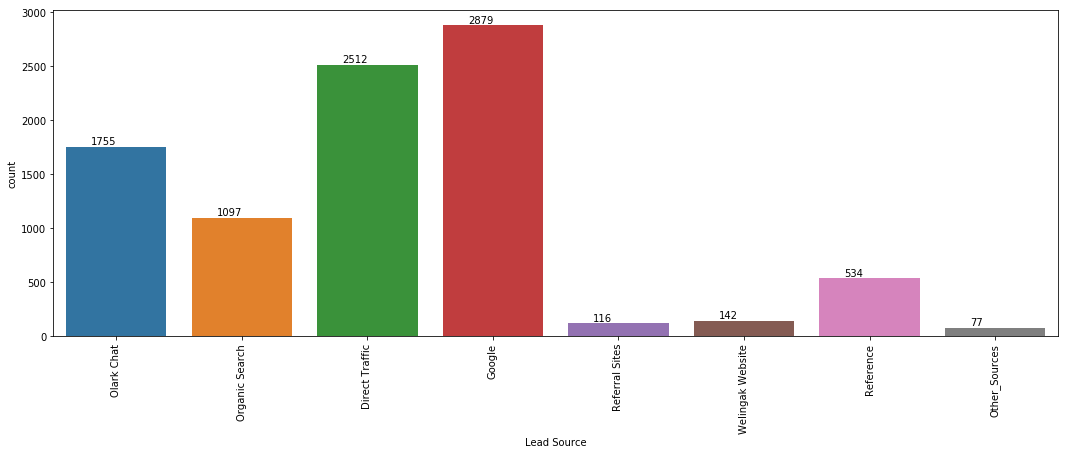

In [109]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(18,6))
ax=sns.countplot(data['Lead Source'])
plt.xticks(rotation=90)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+25))  
plt.show()

In [110]:
round(100*(data['Last Activity'].value_counts()/len(data.index)),2)

Email Opened                    38.32
SMS Sent                        29.59
Olark Chat Conversation         10.61
Page Visited on Website          6.88
Converted to Lead                4.69
Email Bounced                    3.54
Email Link Clicked               2.91
Form Submitted on Website        1.26
Unreachable                      0.99
Unsubscribed                     0.66
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.05
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [111]:
data['Last Activity']=data['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'],'Other_LastActivity')

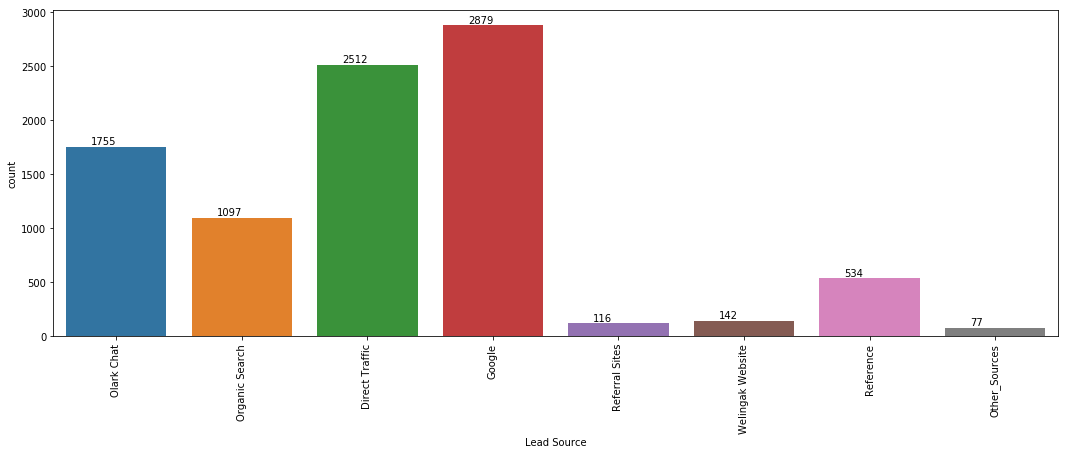

In [112]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(18,6))
ax=sns.countplot(data['Lead Source'])
plt.xticks(rotation=90)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+25))  
plt.show()

In [113]:
round(100*(data['Country'].value_counts()/len(data.index)),2)

India                   96.88
United States            0.76
United Arab Emirates     0.58
Singapore                0.25
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
France                   0.07
Oman                     0.07
Nigeria                  0.04
Kuwait                   0.04
unknown                  0.04
South Africa             0.04
Canada                   0.04
Germany                  0.04
Sweden                   0.03
Belgium                  0.02
Bangladesh               0.02
China                    0.02
Philippines              0.02
Italy                    0.02
Ghana                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Vietnam                  0.01
Denmark                  0.01
Russia                   0.01
Tanzania                 0.01
Sri Lanka                0.01
Kenya                    0.01
Malaysia  

In [114]:
data['Country']=data['Country'].replace(['United Arab Emirates','United States','Saudi Arabia','Singapore','France','Nigeria','Bahrain','South Africa','Qatar','Oman','Australia','Hong Kong','United Kingdom','Kuwait','Bangladesh','Ghana','Uganda','Italy','Kenya','Denmark','Tanzania','Philippines','Liberia','Germany','Germany','Canada','Sweden','Asia/Pacific Region','Belgium','China','Indonesia','Switzerland','Netherlands','Sri Lanka','Vietnam','Malaysia','Russia'],'Other_Country')

In [115]:
round(100*(data['Country'].value_counts()/len(data.index)),2)

India            96.88
Other_Country     3.07
unknown           0.04
Name: Country, dtype: float64

In [116]:
round(100*(data['Specialization'].value_counts()/len(data.index)),2)

Other_Specialization                 36.92
Finance Management                   10.54
Human Resource Management             9.16
Marketing Management                  9.06
Operations Management                 5.45
Business Administration               4.37
IT Projects Management                3.94
Supply Chain Management               3.73
Banking, Investment And Insurance     3.61
Media and Advertising                 2.18
Travel and Tourism                    2.12
International Business                1.92
Healthcare Management                 1.71
Hospitality Management                1.21
E-COMMERCE                            1.17
Retail Management                     1.08
Rural and Agribusiness                0.80
E-Business                            0.60
Services Excellence                   0.42
Name: Specialization, dtype: float64

In [117]:
data['Specialization']=data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'],'Other_Specialization')

In [118]:
round(100*(data['Specialization'].value_counts()/len(data.index)),2)

Other_Specialization                 38.74
Finance Management                   10.54
Human Resource Management             9.16
Marketing Management                  9.06
Operations Management                 5.45
Business Administration               4.37
IT Projects Management                3.94
Supply Chain Management               3.73
Banking, Investment And Insurance     3.61
Media and Advertising                 2.18
Travel and Tourism                    2.12
International Business                1.92
Healthcare Management                 1.71
Hospitality Management                1.21
E-COMMERCE                            1.17
Retail Management                     1.08
Name: Specialization, dtype: float64

In [119]:
round(100*(data['What is your current occupation'].value_counts()/len(data.index)),2)

Unemployed              60.58
Other                   29.35
Working Professional     7.62
Student                  2.27
Housewife                0.11
Businessman              0.08
Name: What is your current occupation, dtype: float64

In [120]:
data['What is your current occupation']=data['What is your current occupation'].replace([['Other','Housewife','Businessman']],"Other_Occupation")

In [121]:
round(100*(data['What is your current occupation'].value_counts()/len(data.index)),2)

Unemployed              60.58
Other_Occupation        29.53
Working Professional     7.62
Student                  2.27
Name: What is your current occupation, dtype: float64

In [122]:
round(100*(data['Tags'].value_counts()/len(data.index)),2)

Unknown                                              36.39
Will revert after reading the email                  22.37
Ringing                                              12.95
Interested in other courses                           5.59
Already a student                                     5.06
Closed by Horizzon                                    3.91
switched off                                          2.59
Busy                                                  2.00
Lost to EINS                                          1.89
Not doing further education                           1.56
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.87
Diploma holder (Not Eligible)                         0.69
wrong number given                                    0.48
opp hangup                                            0.36
number not provided                                   0.

In [123]:
data['Tags']=data['Tags'].replace([['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','Interested in Next batch','In confusion whether part time or DLP','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']],"Other_Tag")

In [124]:
round(100*(data['Tags'].value_counts()/len(data.index)),2)

Unknown                                36.39
Will revert after reading the email    22.37
Ringing                                12.95
Interested in other courses             5.59
Already a student                       5.06
Closed by Horizzon                      3.91
Other_Tag                               3.24
switched off                            2.59
Busy                                    2.00
Lost to EINS                            1.89
Not doing further education             1.56
Interested  in full time MBA            1.27
Graduation in progress                  1.20
Name: Tags, dtype: float64

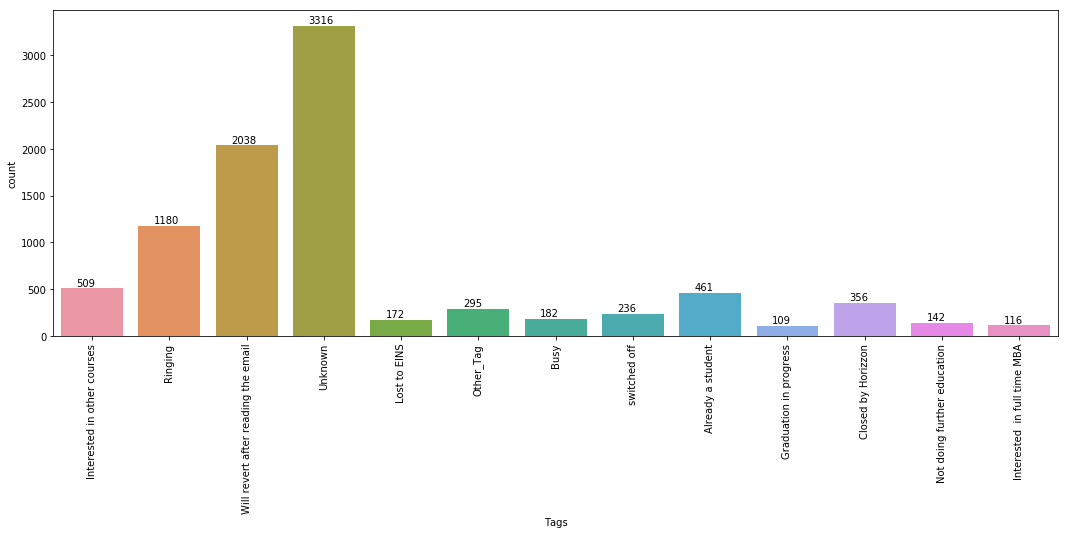

In [125]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(18,6))
ax=sns.countplot(data['Tags'])
plt.xticks(rotation=90)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+25))  
plt.show()

In [126]:
round(100*(data['Lead Quality'].value_counts()/len(data.index)),2)

Unknown              51.69
Might be             16.81
Not Sure             11.76
High in Relevance     6.90
Worst                 6.52
Low in Relevance      6.31
Name: Lead Quality, dtype: float64

In [127]:
round(100*(data['Last Notable Activity'].value_counts()/len(data.index)),2)

Modified                        36.91
Email Opened                    30.61
SMS Sent                        23.41
Page Visited on Website          3.46
Olark Chat Conversation          2.01
Email Link Clicked               1.88
Email Bounced                    0.66
Unsubscribed                     0.50
Unreachable                      0.34
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Form Submitted on Website        0.01
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [128]:
data['Last Notable Activity']=data['Last Notable Activity'].replace([['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Email Received','Resubscribed to emails','Form Submitted on Website','View in browser link Clicked']],"Other__LastNotableAcitivity")

In [129]:
round(100*(data['Last Notable Activity'].value_counts()/len(data.index)),2)

Modified                       36.91
Email Opened                   30.61
SMS Sent                       23.41
Page Visited on Website         3.46
Olark Chat Conversation         2.01
Email Link Clicked              1.88
Other__LastNotableAcitivity     1.73
Name: Last Notable Activity, dtype: float64

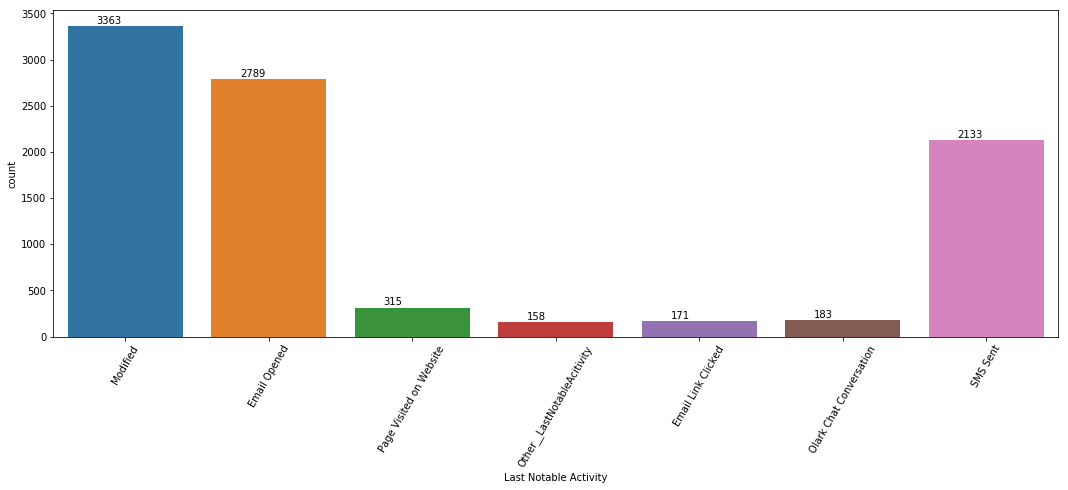

In [130]:
#Starting with the columns having highest missing values-'Lead Quality'
plt.figure(figsize=(18,6))
ax=sns.countplot(data['Last Notable Activity'])
plt.xticks(rotation=60)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+25))  
plt.show()

### Exploratory Data Analysis- To understand effect of variables on conversion

**Defining a function for univariate analysis to avoid repetitiveness**

In [131]:
def seg_univariate(col,width=20,height=10,rotation=90):
    data_col=data.groupby([col,'Converted']).Converted.count().unstack()
    data_col_per=round(100*data_col.div(data_col.sum(axis=1),axis=0),2)
    ax=data_col_per.plot(kind="bar", stacked=True,color=('lightseagreen','salmon'),figsize=(width,height))
    ax.legend(loc='upper right',shadow='True',fontsize=12) 
    plt.xticks(rotation=rotation,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('percent',fontsize=16)
    for p in ax.patches:
        width,height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:1.2f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.2*height),fontsize=12)    
plt.show()

**Defining a function for Segmented univariate analysis to avoid repetitiveness**

In [132]:
def bivariate(data,col,width=20,height=10,rotation=90):
                
        fig, ax = plt.subplots(figsize=(width,height))
        sns.countplot(data = data, x= col,order=data[col].value_counts().index)
        plt.xticks(rotation=rotation,fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel(col,fontsize=18)
        plt.ylabel('count',fontsize=18)
        plt.tight_layout()
        for p in ax.patches:
                if float(p.get_height()) > 0:
                    height = p.get_height()
                    ax.annotate('{:1.2f}%'.format((height*100)/float(len(data))), (p.get_x()+0.05, height+100),weight='bold',fontsize=14)  
                else:
                    height = .00000001
                    ax.annotate('{:1.2f}%'.format((height*100)/float(len(data))), (p.get_x()+0.05, height+20),weight='bold',fontsize=14)  
        
plt.show()


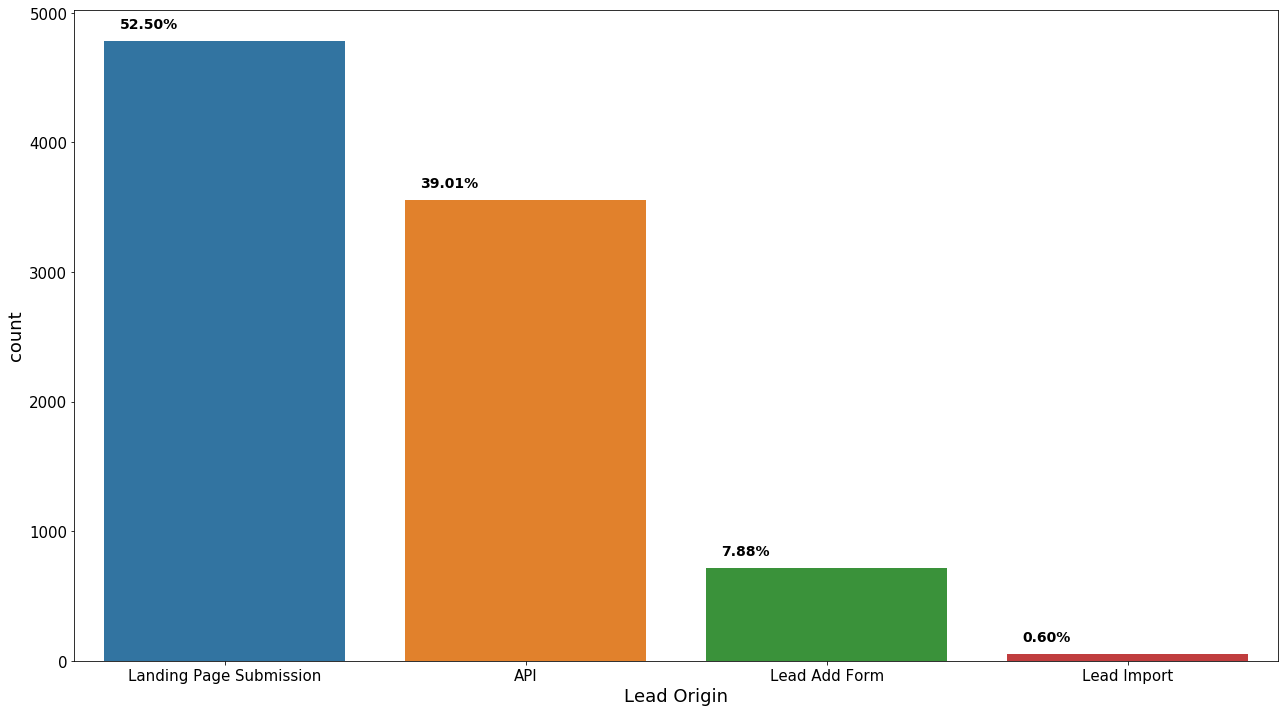

In [133]:
bivariate(data,col='Lead Origin',width=18,height=10,rotation=0)

Inference: Order of Lead origin (Max to Min)- Landing Page Submission->API->Lead Add Form->Lead Import

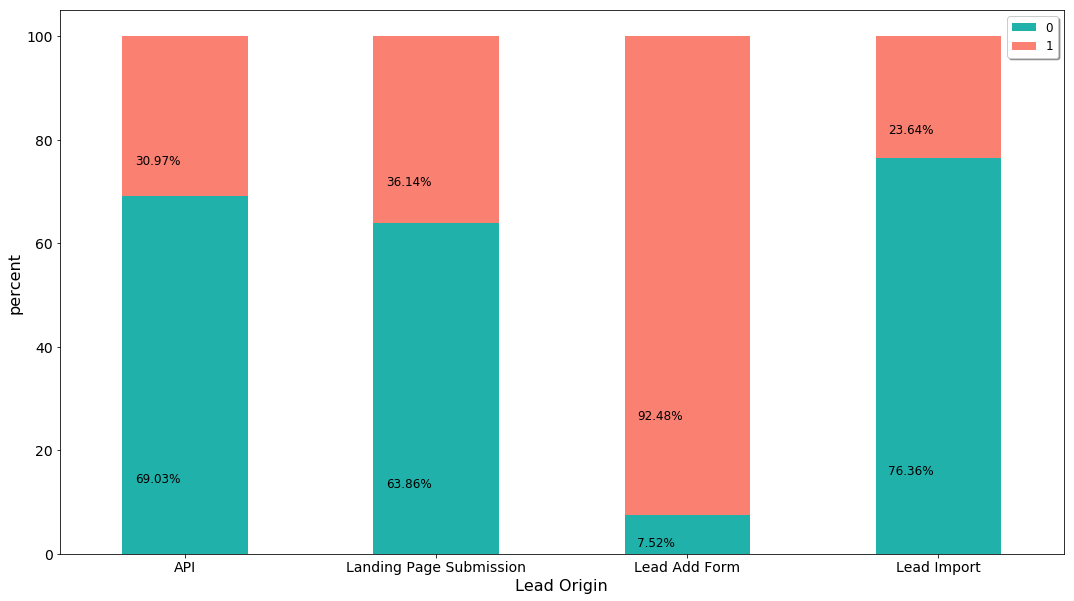

In [134]:
seg_univariate(col='Lead Origin',width=18,height=10,rotation=0)

Inference-Order of Conversion rate (Max to Min)-Lead Add Form->Landing Page Submission->API->Lead Import.
Though Lead Add Form represents just 8% of total Lead Origins, its conversion rate is very high at 92.5%.
Whereas Landing Page Submission being 52% of all records has moderate conversion rate of 36%
Company should focus on High conversion providing "Lead ADD Form"

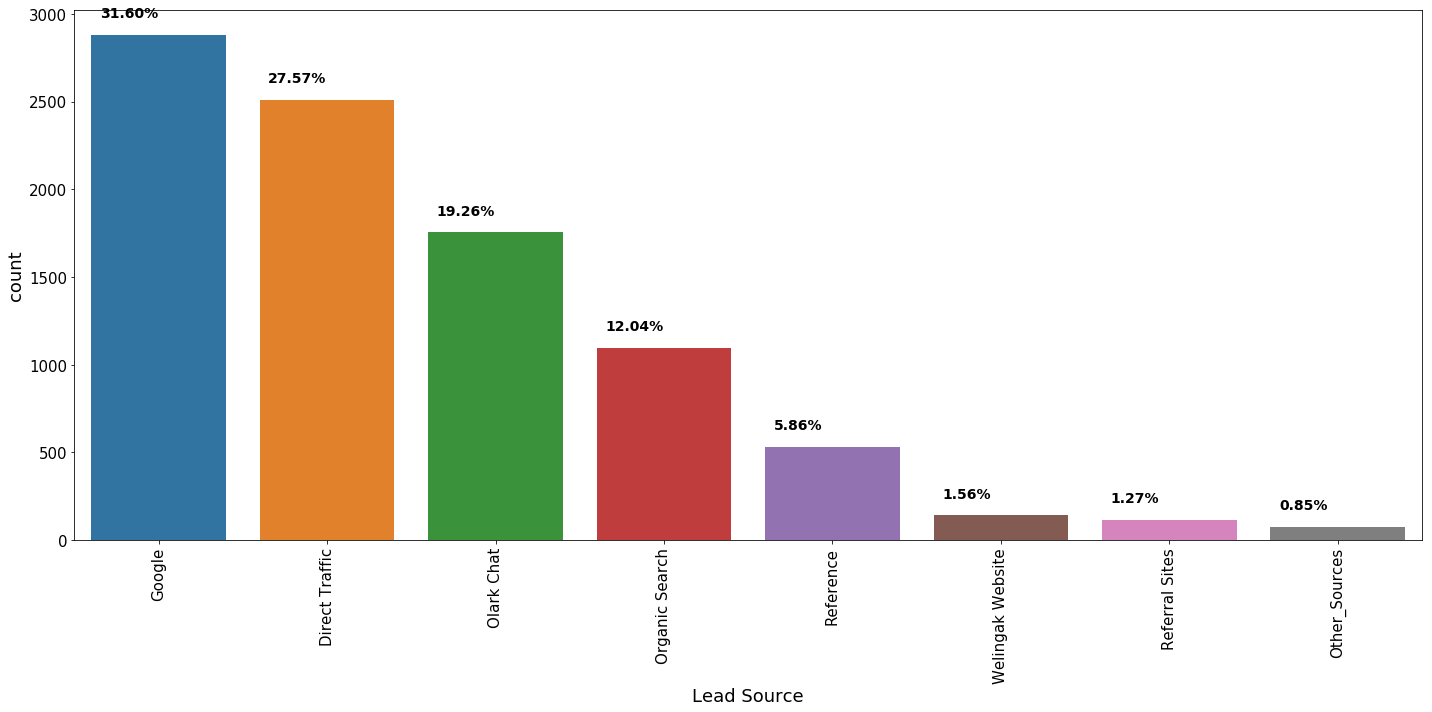

In [135]:
bivariate(data,col='Lead Source')

Inference-'Lead Source' order (Max to Min)-Google->Direct Traffic->Olark Chat->Organic Search->Reference->Welingkar Website->Referral Sites->Other_Sources
Maximum 32% Leads are coming from Google

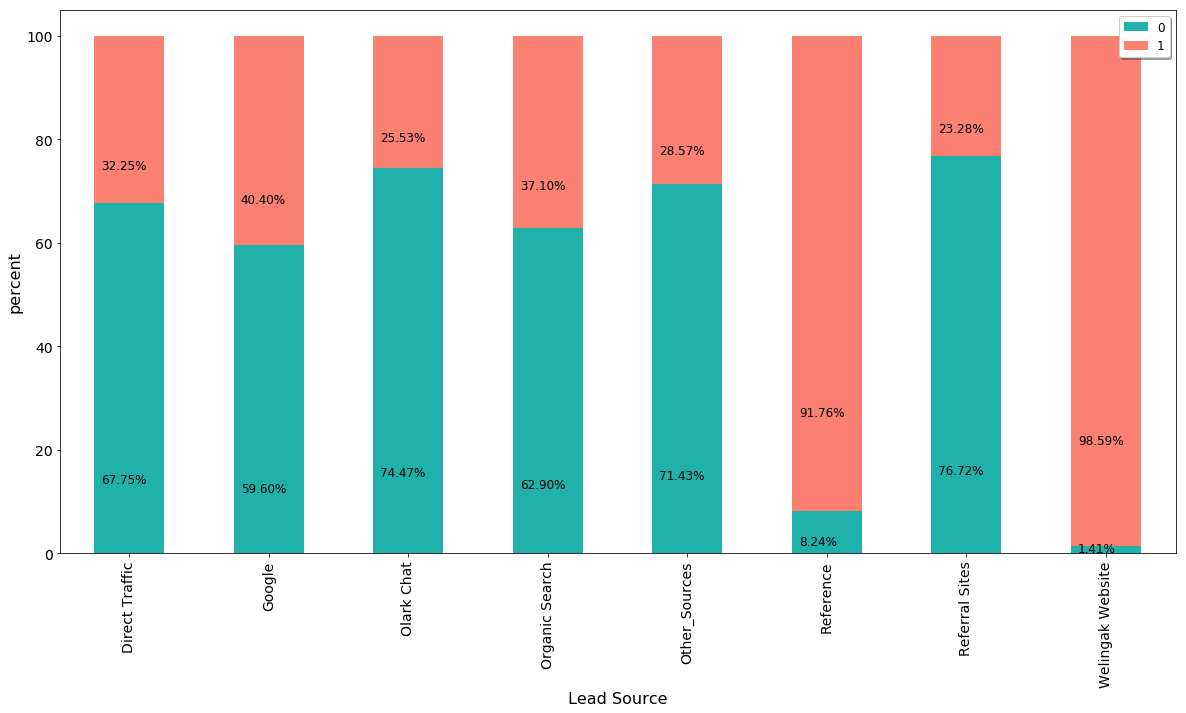

In [136]:
seg_univariate(col='Lead Source')

Inference- Though 'Reference' & 'Welingkar Website' contribute just 5.86% and 1.56%, both of these have Maximum converison rate 
Conversion Rate-
Reference-91.76%
Welingkar Website-98.59%

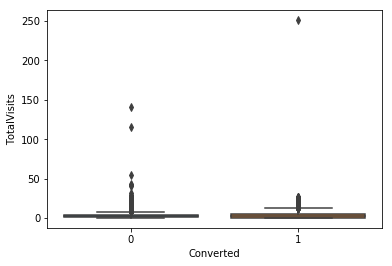

In [137]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

In [138]:
data['TotalVisits'].quantile(0.997)

23.0

In [139]:
df=data.loc[data['TotalVisits']<=23]

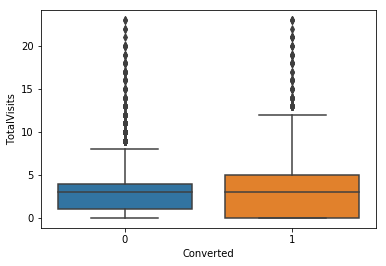

In [140]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Inference- It is clear that Median for Converted & Not Converted is same. It indicates that Number of Websites visits isn't making much impact on Conversion process.

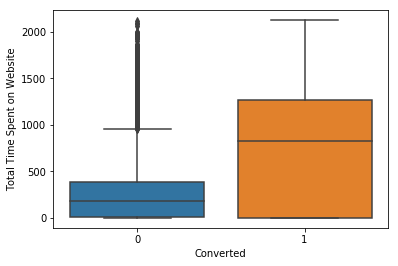

In [141]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)
plt.show()

Inference-For more Total time spent on website, Conversion is more. Hence people should be encouraged to spend more time on X education's website.

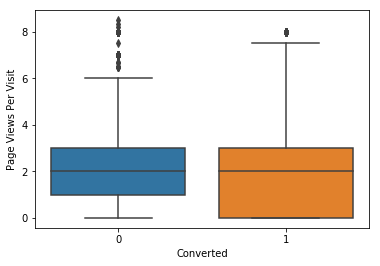

In [142]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
plt.show()

Inference-Median for Converted & Not Converted for variable 'Page Views Per Visit' is same, indicates that the pages viewed per visit doesn't make much impact on Conversion.

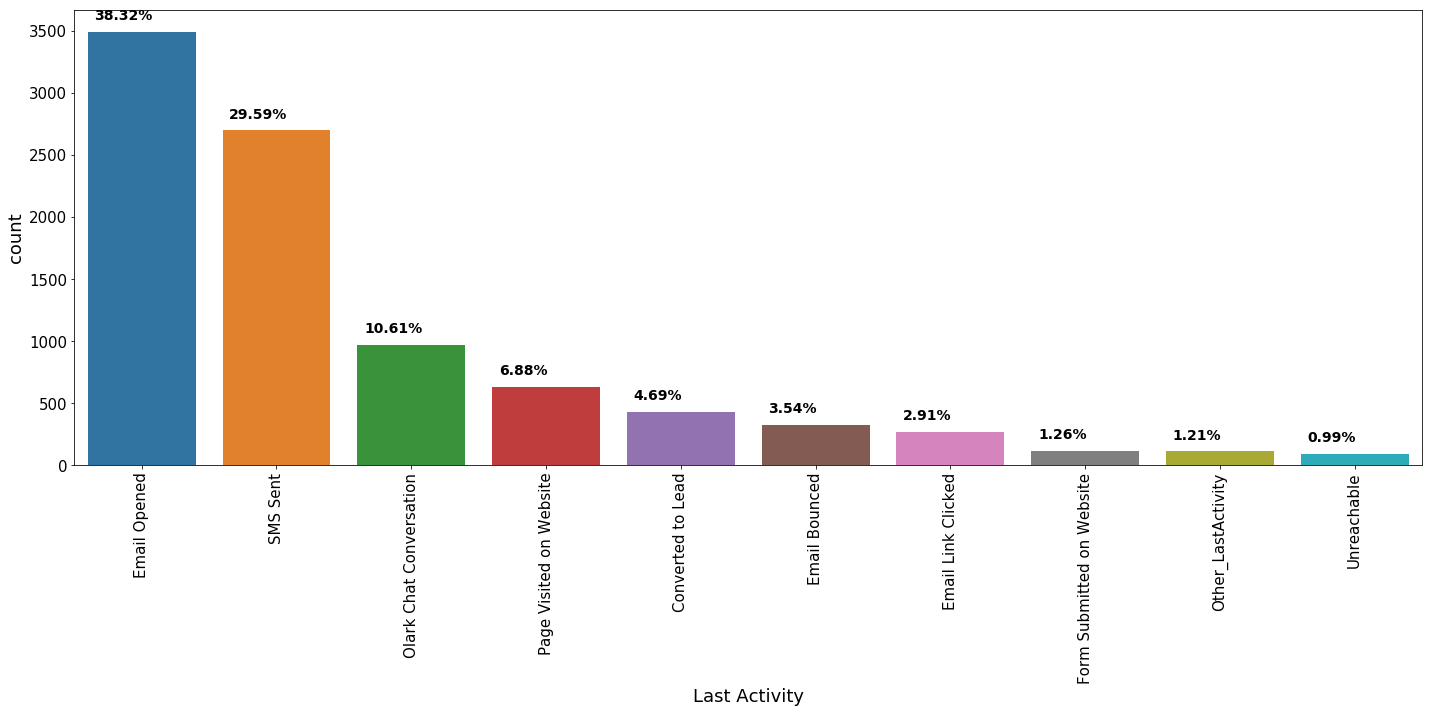

In [143]:
bivariate(data,col='Last Activity',width=20,height=10)

Inference-Last Activity observed is maximum for Email opened at 38.32%, followed by SMS sent at 29.59%.
Order of Max to Min- email Opened->SMS Sent->Olark Chat Conversation->Page Visited On Website->Converted to Lead->Email Bounced->Email Link CLicked->Form Submitted On Website->Other_LastActivity->Unreachable

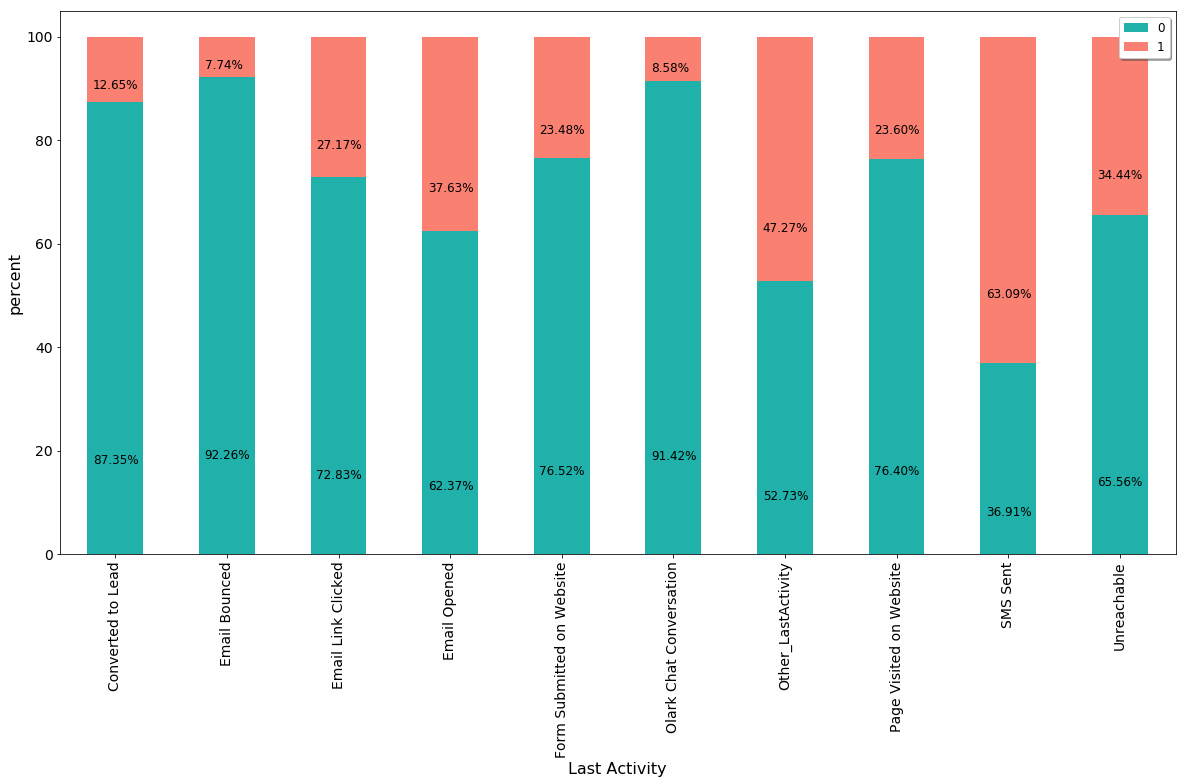

In [144]:
seg_univariate(col='Last Activity',width=20,height=10)

Inference-Maximum Conversion (63.09%) is for the people to whom Last Activity is SMS sent. This is followed by Other_LastActivity at 47.27%.

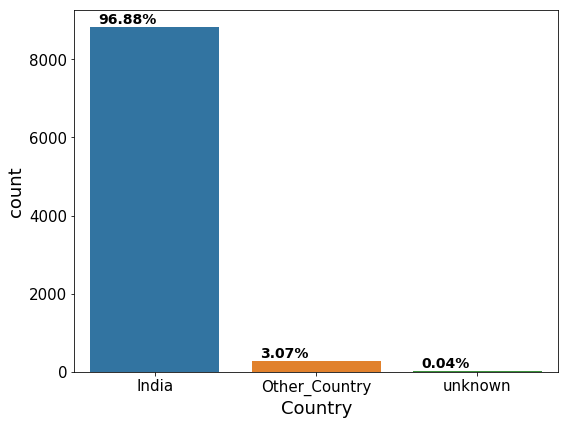

In [145]:
bivariate(data,col='Country',width=8,height=6,rotation=0)

Inference-96.88% of data comes from India and just 3.11% from Countries other than India.

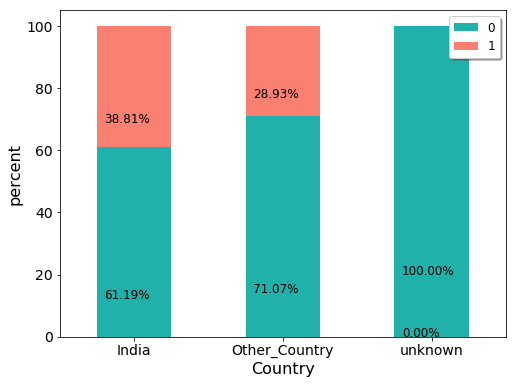

In [146]:
seg_univariate(col='Country',width=8,height=6,rotation=0)

Inference-Conversion rate for India is higher at 38.81% while for Other Countries it is 29%. Hence X education should concentrate better on Indian prospective leads. Whereas prospects from unknown whereabouts have no conversion at all and X education can stop wasting resources on them.

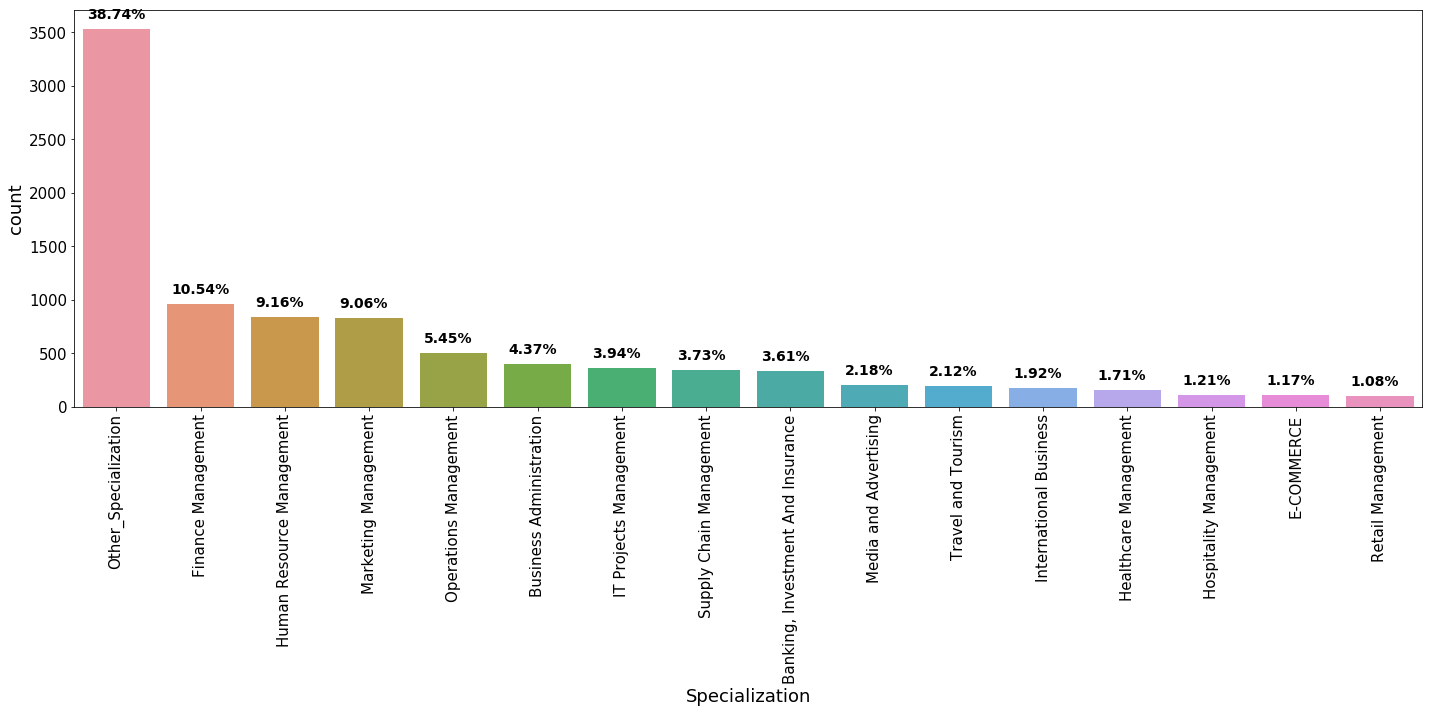

In [147]:
bivariate(data,col='Specialization')

Inference-Maximum percentage of data comes from category 'Other_Specialization' followed by FInance Management at 10.54%. All other categories are contributing less than 10%.

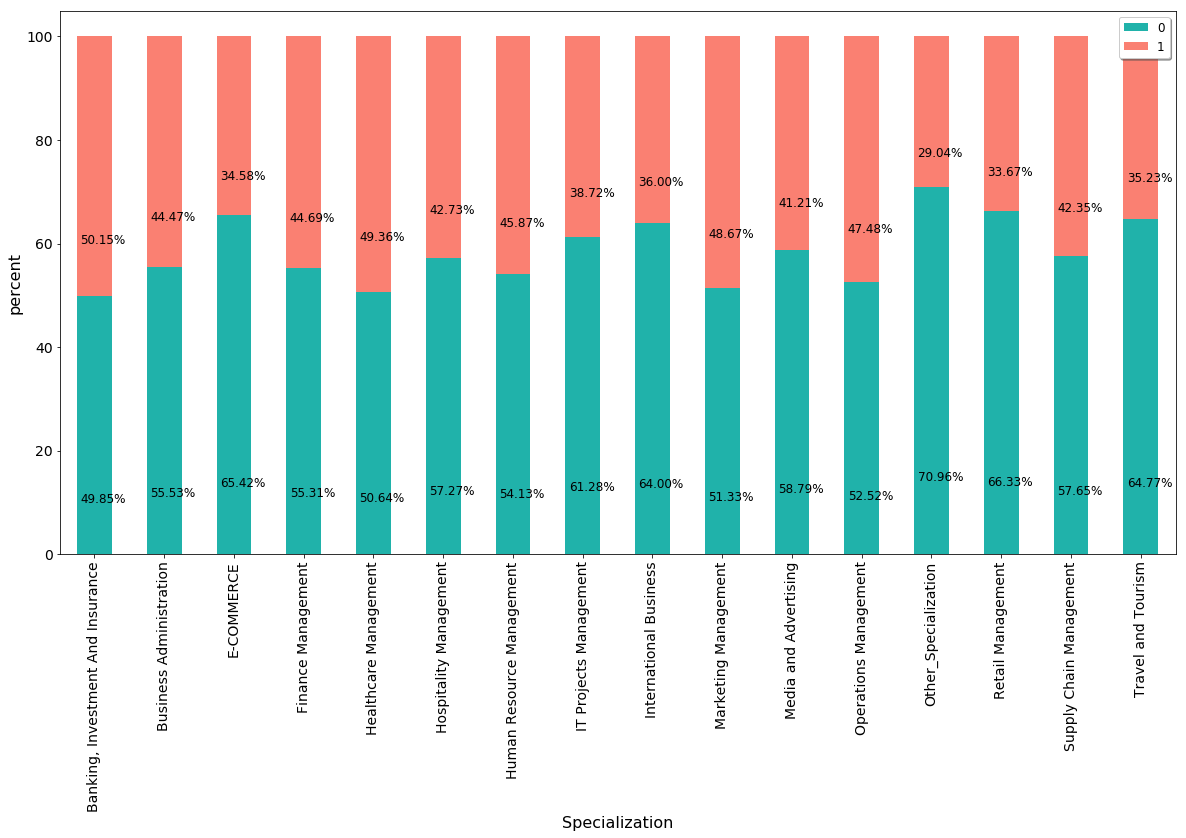

In [148]:
seg_univariate(col='Specialization')

Maximum Conversion is from Banking, Investment & Insurance at 50.15% followed by Healthcare Managemnt at 49.36%. Marketing Management is closeby at 48.67% and Operations Management at 47.48%.

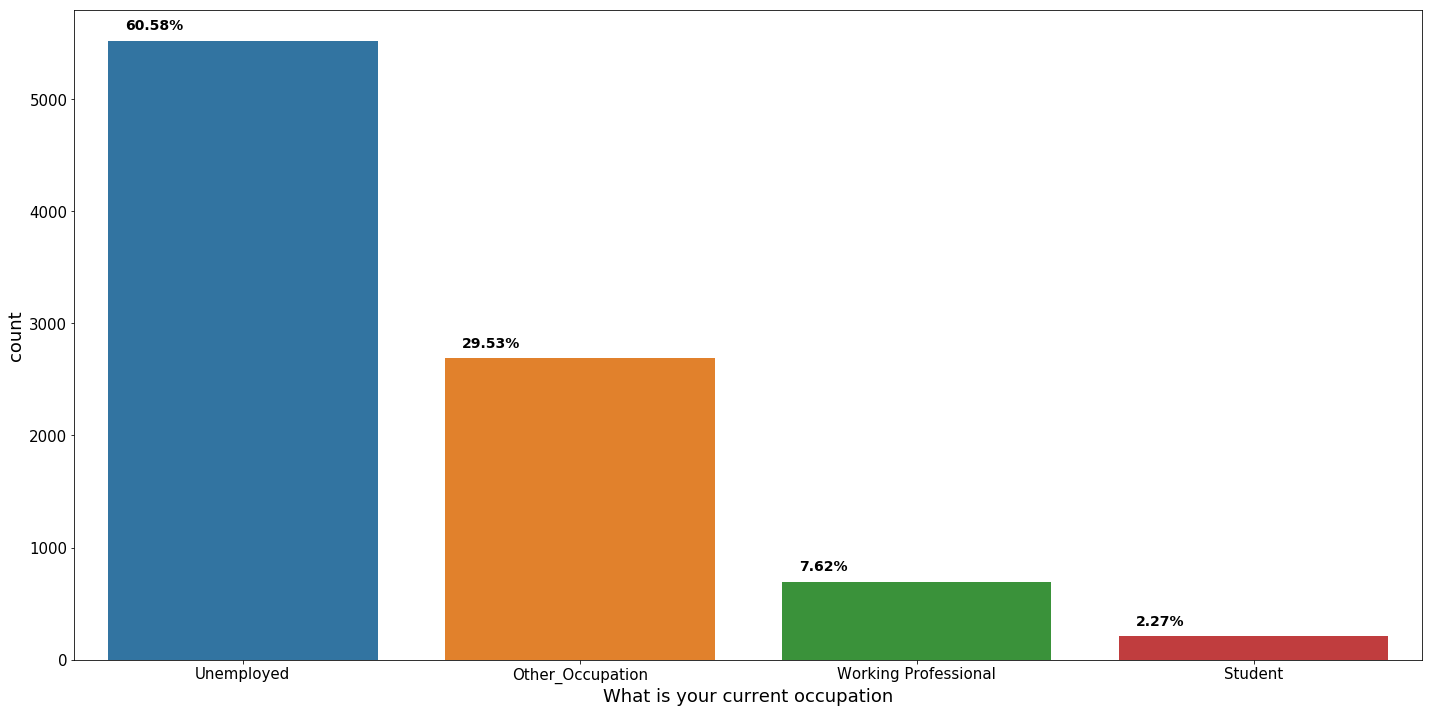

In [149]:
bivariate(data,col='What is your current occupation',rotation=0)

Inference-Maximum data i.e. 60.58% is from Unemployed people followed by Other_Occupation at 29.53%.

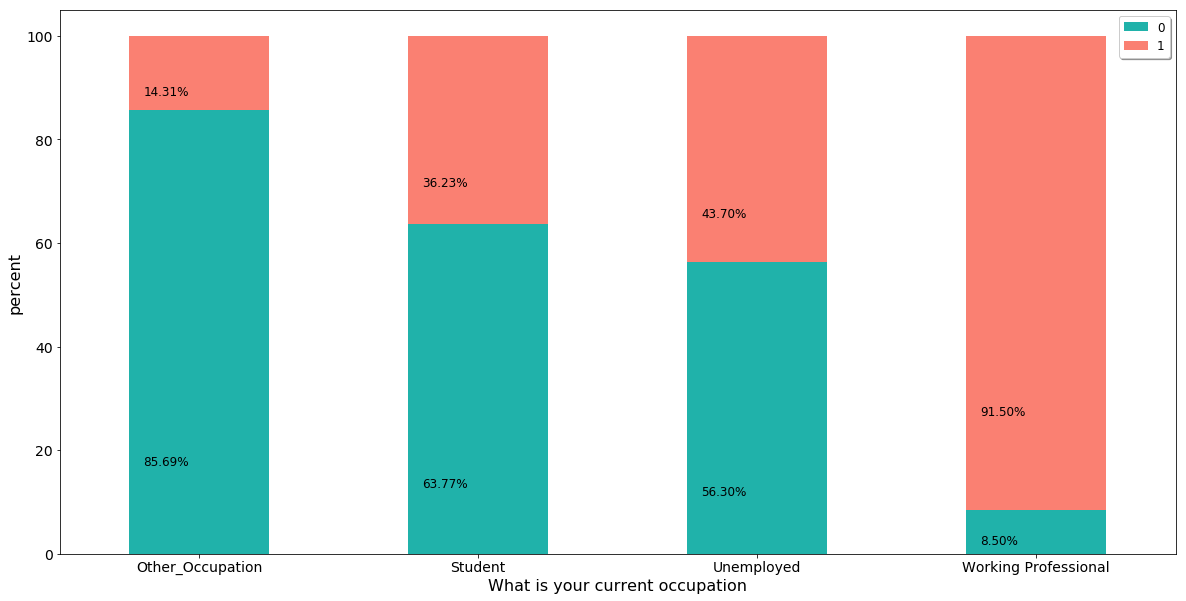

In [150]:
seg_univariate(col='What is your current occupation',rotation=0)

Inference-However the Conversion rate is huge at 91.50% for working Professional who represent just 7.62% data. Hence X Education needs to increase its reach to working professionals.Unemployed people have a modest conversion rate of 43.70% and X edu. might concentrate more in convinving them.Other_Occupation provides just 14.31% conversion and is a low focus area.

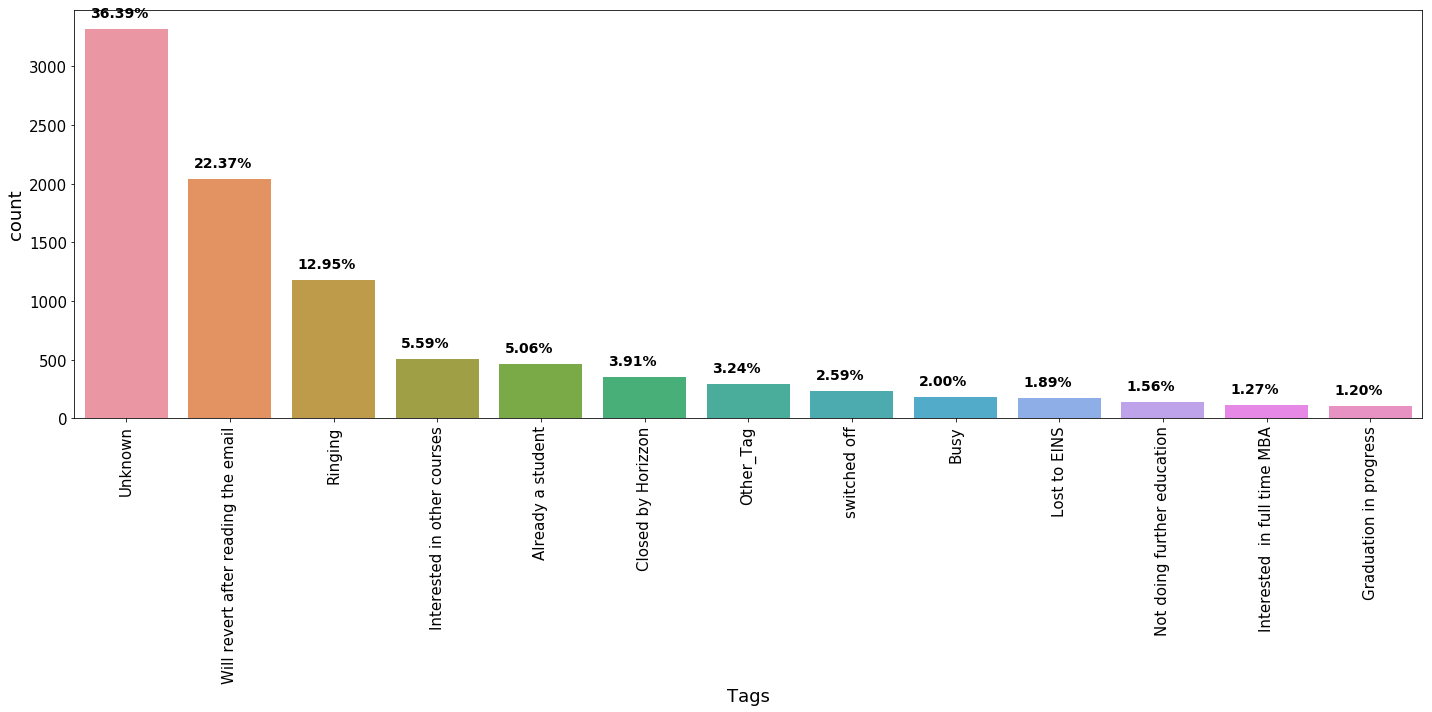

In [151]:
bivariate(data,col='Tags')

Inference-'Unknown' tags are maximum at 36.39% followed by 'will revert after reading the email' at 22.37%. 

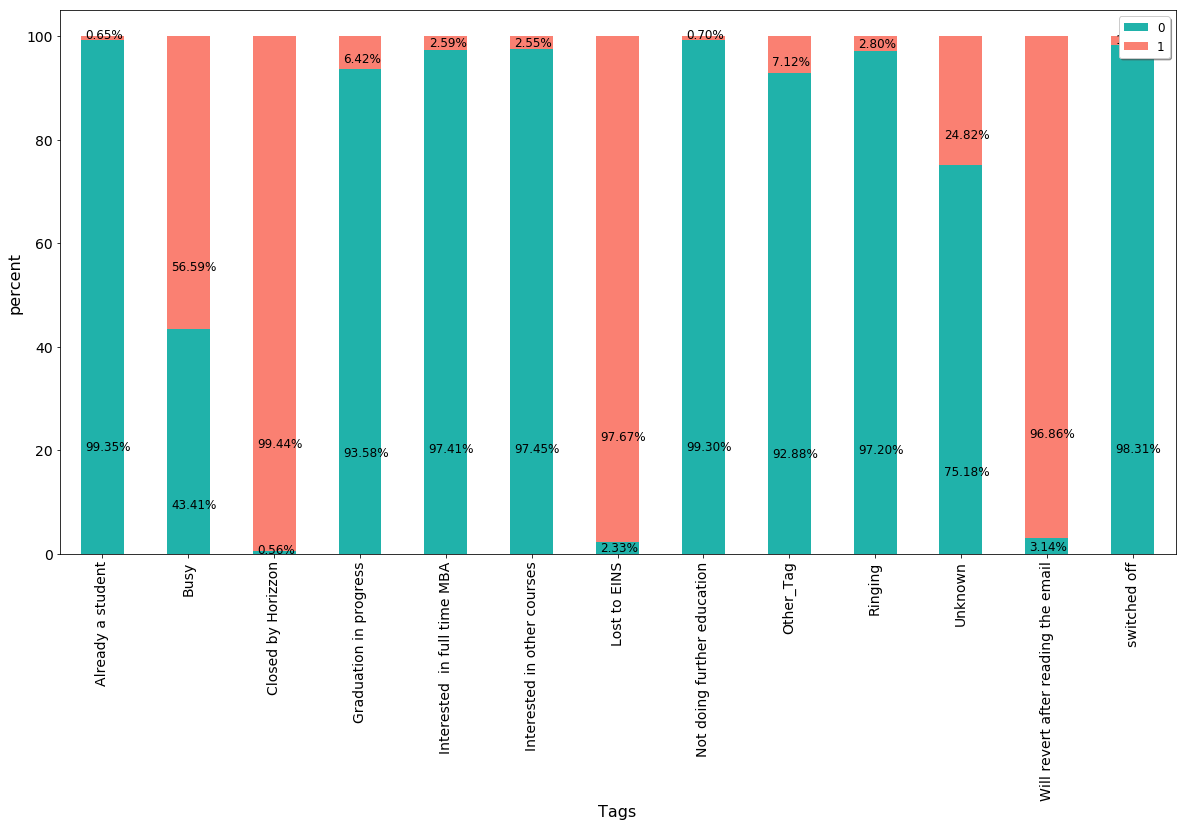

In [152]:
seg_univariate(col='Tags')

Inference- Tags of 'Closed by Horizon' has a staggering conversion rate of 99.44% and this tag is 3.91% of total data. This is followed by 'Lost to EINS' at 97.67%,this tag represents 1.89% of toal data. It indicates that X edu needs to look into its Tags assignment methodology. The customers who were believed to have been shifted to other companies have actually converted with a huge percentage. The tags of Will revert after reading the email(22.37% of total data) also has high conversion rates of 96.86%, indicating its a useful Customer tag and should be paid attention.

Busy (2% of total data) has modest 56.59% conversion.

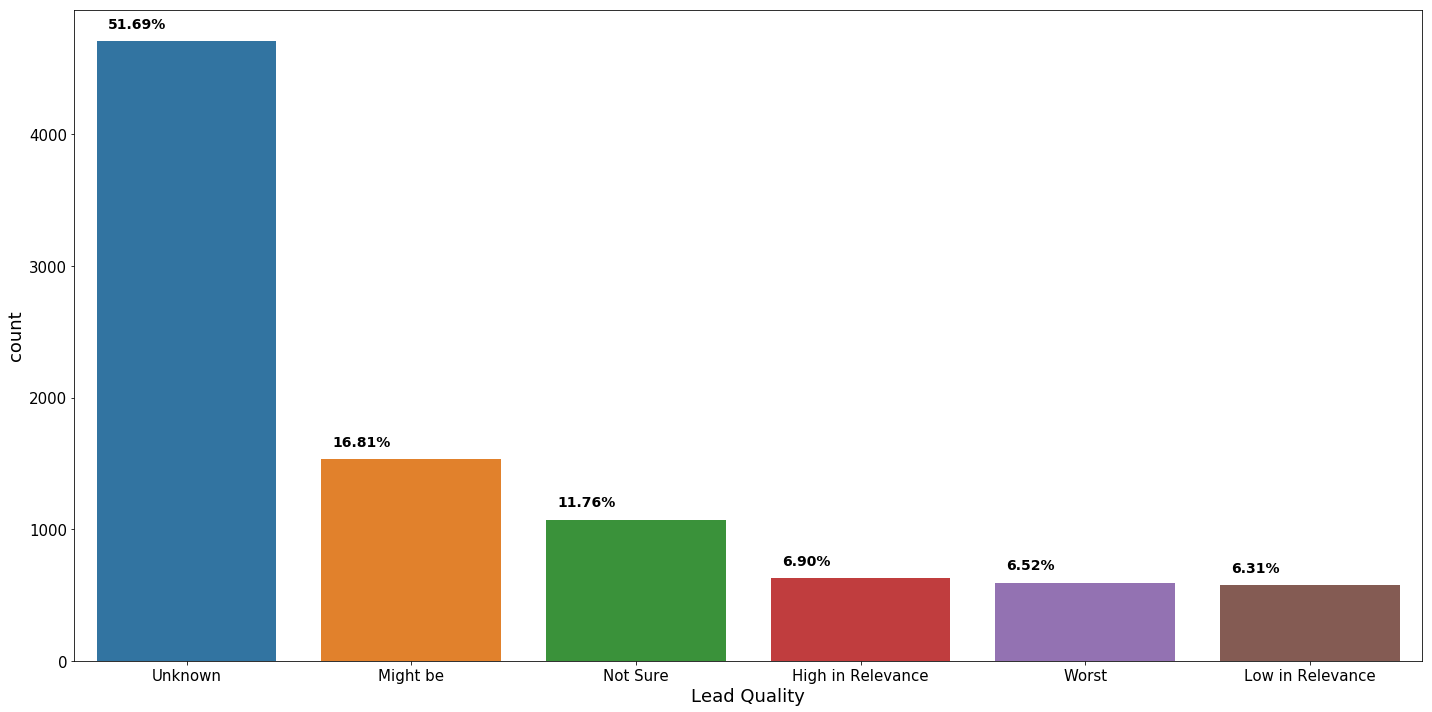

In [153]:
bivariate(data,col='Lead Quality',rotation=0)

Inference-51.69% of data is classified as Unsure followed by Might be at 16.81%.

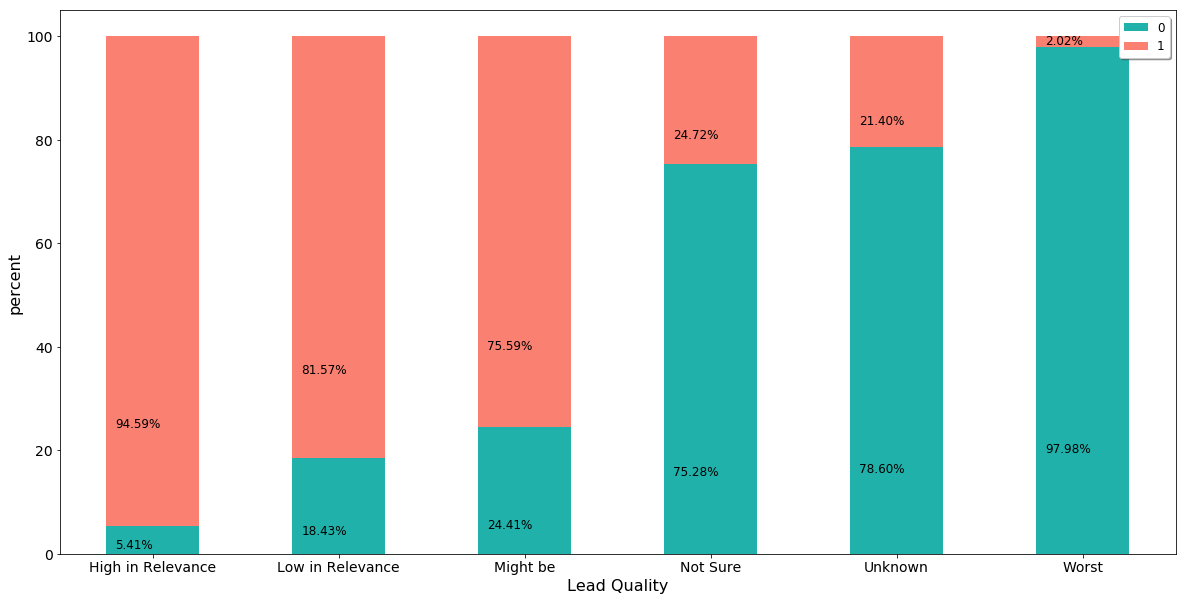

In [154]:
seg_univariate(col='Lead Quality',rotation=0)

Inference-The Lead Quality of 'High in Relevance' has huge conversion rate of 94.59% but represents just 6.9% of total data and needs to be paid more attention. The category maximum present i.e. Unknown has only 21.40% Conversion indicating a low potential area.

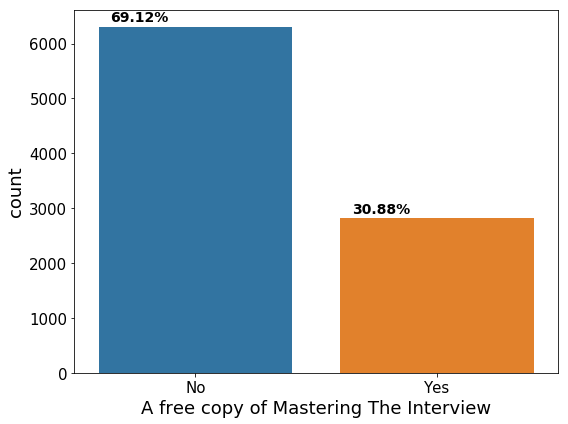

In [155]:
bivariate(data,col='A free copy of Mastering The Interview',width=8,height=6,rotation=0)

Inference- Only 30.88% showed an interest in availing A free copy of mastering the interview.

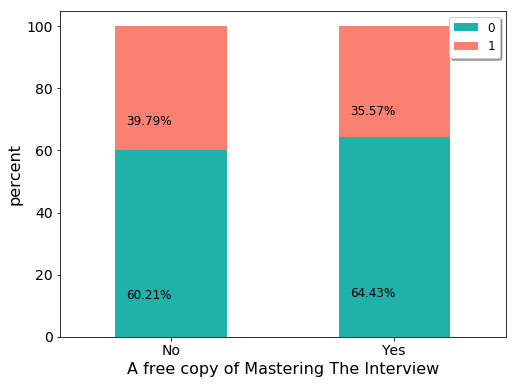

In [156]:
seg_univariate(col='A free copy of Mastering The Interview',width=8,height=6,rotation=0)

Inference-This variable is not making any difference on converison rate with customers who are not taking this having a higher converison  at 39.79%. Hence X education may stop offering this to customers in presence of any significant impact seen.

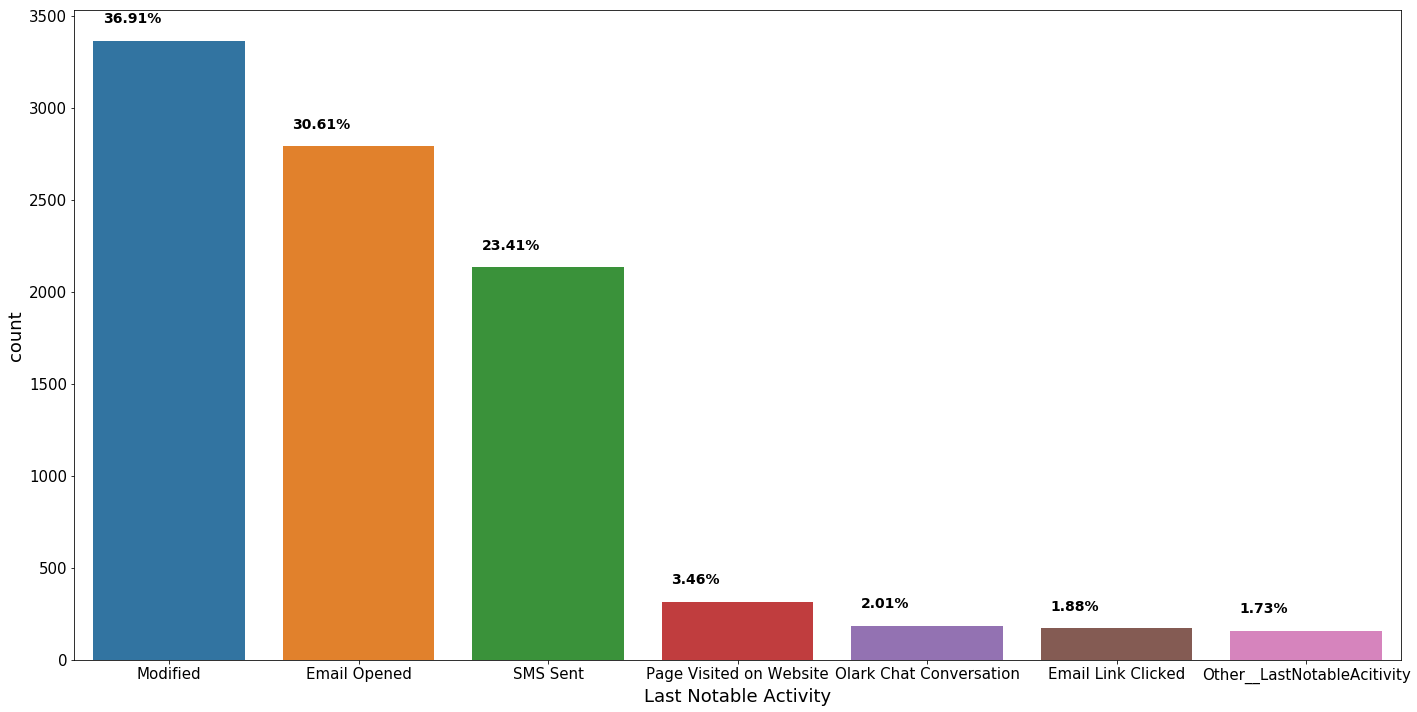

In [157]:
bivariate(data,col='Last Notable Activity',rotation=0)

Inference-36.91% of data is Modified Last Notable Activity, followed by Email opened at 30.61%

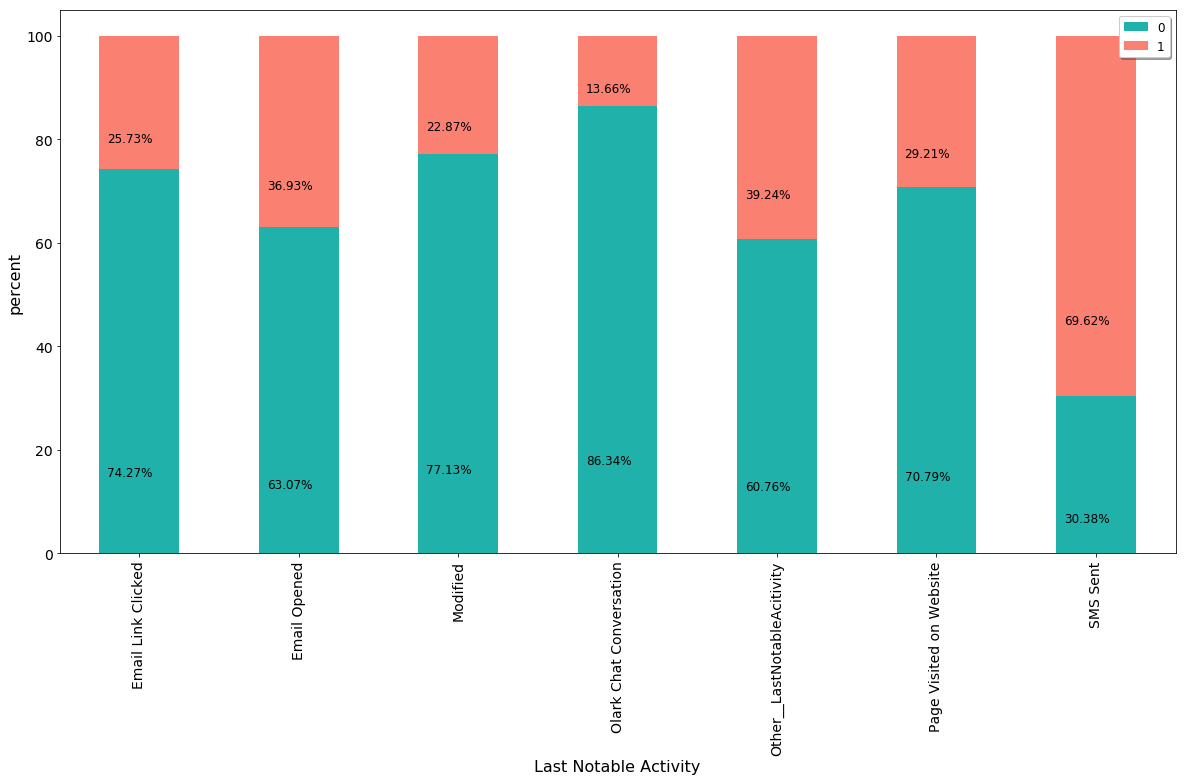

In [158]:
seg_univariate(col='Last Notable Activity')

Inference-Converison rate is highest for SMS sent at 69.62% which is 23.41% of total data. Whereas Maximum present category Modified has just 22.87% . Hence X education should send more SMS to leads. And consider Modified as low potential area.

**Dummy variable creation for Logistic regression.**

In [159]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [160]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9239
Data columns (total 77 columns):
Lead Origin                                             9112 non-null object
Lead Source                                             9112 non-null object
Do Not Email                                            9112 non-null int64
Converted                                               9112 non-null int64
TotalVisits                                             9112 non-null float64
Total Time Spent on Website                             9112 non-null int64
Page Views Per Visit                                    9112 non-null float64
Last Activity                                           9112 non-null object
Country                                                 9112 non-null object
Specialization                                          9112 non-null object
What is your current occupation                         9112 non-null object
Tags                                           

In [162]:
data=data.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity'],axis=1)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9239
Data columns (total 68 columns):
Do Not Email                                            9112 non-null int64
Converted                                               9112 non-null int64
TotalVisits                                             9112 non-null float64
Total Time Spent on Website                             9112 non-null int64
Page Views Per Visit                                    9112 non-null float64
A free copy of Mastering The Interview                  9112 non-null int64
Lead Origin_Landing Page Submission                     9112 non-null uint8
Lead Origin_Lead Add Form                               9112 non-null uint8
Lead Origin_Lead Import                                 9112 non-null uint8
Lead Source_Google                                      9112 non-null uint8
Lead Source_Olark Chat                                  9112 non-null uint8
Lead Source_Organic Search                           

In [164]:
data.shape

(9112, 68)

In [165]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other__LastNotableAcitivity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0


## Test Train Split

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
# Putting feature variable to X
X = data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other__LastNotableAcitivity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [168]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [169]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Feature Scaling**

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other__LastNotableAcitivity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
309,0,0.328238,-0.399270,0.156262,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3745,0,0.133801,-0.555732,0.970750,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
8035,0,-0.643946,-0.883382,-1.201218,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8286,0,-0.060636,1.864828,0.427758,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
7954,1,-0.060636,-0.629361,0.427758,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [172]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Model Building

In [173]:
import statsmodels.api as sm

In [174]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           67
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1016.6
Date:                Mon, 10 Jun 2019   Deviance:                       2033.1
Time:                        09:07:51   Pearson chi2:                 2.65e+04
No. Iterations:                    25   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0854      1.395     -4.361      0.000      -8.820      -3.350
Do Not Email                                            -1.3341      0.340     -3.920      0.000      -2.001      -0.667
TotalVisits                                              0.1389      0.039      3.562      0.000       0.062       0.215
Total Time Spent on Website                              0.9913      0.069     14.345      0.000       0.856       1.127
Page Views Per Visit                                    -0.2202      0.095     -2.314      0.021      -0.407      -0.034
A free copy of Mastering The Interview                   0.0202      0.198      0.102      0.919      -0.369       0.409
Lead Origin_Landing Page Submission                     -0.3282      0.235     -1.394      0.163      -0.790       0.133
Lead Origin_Lead Add Form                                1.3893      0.880      1.578      0.115      -0.336       3.115
Lead Origin_Lead Import                                  0.2707      1.321      0.205      0.838      -2.319       2.860
Lead Source_Google                                       0.3074      0.207      1.483      0.138      -0.099       0.714
Lead Source_Olark Chat                                   0.8882      0.274      3.236      0.001       0.350       1.426
Lead Source_Organic Search                               0.5761      0.235      2.449      0.014       0.115       1.037
Lead Source_Other_Sources                               -0.4085      1.057     -0.386      0.699      -2.481       1.664
Lead Source_Reference                                   -0.7016      0.969     -0.724      0.469      -2.601       1.198
Lead Source_Referral Sites                              -0.0523      0.540     -0.097      0.923      -1.111       1.006
Lead Source_Welingak Website                             2.4132      1.143      2.111      0.035       0.173       4.654
Last Activity_Email Bounced                             -0.4125      0.752     -0.549      0.583      -1.886       1.061
Last Activity_Email Link Clicked                         0.8274      0.880      0.940      0.347      -0.898       2.553
Last Activity_Email Opened                               0.4012      0.458      0.876      0.381      -0.497       1.299
Last Activity_Form Submitted on Website                  0.6521      0.655      0.995      0.320      -0.632       1.937
Last Activity_Olark Chat Conversation                    0.2103      0.450      0.467      0.640      -0.672       1.093
Last Activity_Other_LastActivity                         0.2395      0.832      0.288      0.774      -1.392       1.871
Last Activity_Page Visited on Website                    0.2858      0.527      0.542      0.588      -0.748       1.319
Last Activity_SM

**Feature Selection Using RFE**

In [175]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [176]:
#rfe = RFECV(estimator=LogisticRegression(), cv=4, scoring='accuracy')
#rfe = rfe.fit(X_train, y_train)

In [177]:
#cols = X_train.columns[rfe.support_]
#acc = accuracy_score(y_test, rfe.estimator_.predict(X_test[cols]))
#print('Number of features selected: {}'.format(rfe.n_features_))
#print('Test Accuracy {}'.format(acc)) 

In [178]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [179]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [180]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 34),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Other_Sources', False, 33),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 31),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', False, 19),
 ('Last Activity_Other_LastActivity', False, 32),
 ('Last Activity_Page Visited on Website', False, 35),
 ('Last Activity_SMS Sen

In [181]:
col = X_train.columns[rfe.support_]

In [182]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other_Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_LastActivity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Country_Other_Country', 'Country_unknown',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Manag

In [183]:
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_Tag', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [184]:
X_train.shape

(6378, 67)

In [185]:
X_train[col].shape

(6378, 20)

##### Assessing the model with StatsModels

In [186]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.0
Date:                Mon, 10 Jun 2019   Deviance:                       2378.0
Time:                        09:07:55   Pearson chi2:                 1.45e+04
No. Iterations:                    25   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3645      0.382    -14.039      0.000      -6.113      -4.616
Do Not Email                                            -1.3363      0.252     -5.303      0.000      -1.830      -0.842
Lead Source_Welingak Website                             2.9613      0.742      3.988      0.000       1.506       4.416
Last Activity_SMS Sent                                   1.4036      0.236      5.950      0.000       0.941       1.866
What is your current occupation_Student                  2.1382      0.511      4.186      0.000       1.137       3.139
What is your current occupation_Unemployed               2.5088      0.145     17.276      0.000       2.224       2.793
What is your current occupation_Working Professional     2.6845      0.364      7.367      0.000       1.970       3.399
Tags_Busy                                                2.3520      0.412      5.709      0.000       1.545       3.159
Tags_Closed by Horizzon                                 30.3584   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Tags_Interested in other courses                        -0.2015      0.528     -0.382      0.702      -1.235       0.832
Tags_Lost to EINS                                        9.3286      0.818     11.407      0.000       7.726      10.932
Tags_Not doing further education                       -22.4734   3.12e+04     -0.001      0.999   -6.11e+04    6.11e+04
Tags_Other_Tag                                          -0.1955      0.465     -0.420      0.675      -1.108       0.717
Tags_Ringing                                            -1.8402      0.422     -4.362      0.000      -2.667      -1.013
Tags_Unknown                                             3.2094      0.369      8.692      0.000       2.486       3.933
Tags_Will revert after reading the email                 6.0777      0.385     15.786      0.000       5.323       6.832
Tags_switched off                                       -3.5342      1.073     -3.294      0.001      -5.637      -1.431
Lead Quality_Worst                                      -2.4827      0.897     -2.769      0.006      -4.240      -0.726
Last Notable Activity_Modified                          -1.2050      0.155     -7.780      0.000      -1.509      -0.901
Last Notable Activity_Olark Chat Conversation           -1.2203      0.442     -2.763      0.006      -2.086      -0.355
Last Notable Activity_SMS Sent                           0.9998      0.271      3.691      0.000       0.469       1.531
========================================================================================================================
"""

In [187]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

309     0.961652
3745    0.004795
8035    0.940311
8286    0.996408
7954    0.029557
3826    0.103853
1942    0.153330
1541    0.033566
4978    0.091743
7076    0.996408
dtype: float64

In [188]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.96165154, 0.00479533, 0.94031134, 0.9964076 , 0.02955684,
       0.10385269, 0.15333048, 0.03356628, 0.09174267, 0.9964076 ])

##### Creating a dataframe with the actual 'Converted' flag and the 'Predicted_Conversion'. Calculating 'Converted_Prob' & 'Lead_Score'

In [189]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.961652
1,0,0.004795
2,1,0.940311
3,1,0.996408
4,0,0.029557


In [190]:
y_train_pred_final['Lead_Score']=round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score
0,1,0.961652,96.0
1,0,0.004795,0.0
2,1,0.940311,94.0
3,1,0.996408,100.0
4,0,0.029557,3.0


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [191]:
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion
0,1,0.961652,96.0,1
1,0,0.004795,0.0,0
2,1,0.940311,94.0,1
3,1,0.996408,100.0,1
4,0,0.029557,3.0,0


In [192]:
from sklearn import metrics

In [193]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)
print(confusion)

[[3696  207]
 [ 209 2266]]


In [194]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.9347757917842584


#### Checking VIFs

In [195]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_SMS Sent,6.21
2,Last Activity_SMS Sent,5.82
4,What is your current occupation_Unemployed,5.44
14,Tags_Will revert after reading the email,3.36
17,Last Notable Activity_Modified,2.22
12,Tags_Ringing,2.14
5,What is your current occupation_Working Profes...,1.94
13,Tags_Unknown,1.68
16,Lead Quality_Worst,1.47
8,Tags_Interested in other courses,1.45


Dropping high p value (0.999) column 'Tags_Not doing further education'

In [197]:
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tag', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [198]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1190.8
Date:                Mon, 10 Jun 2019   Deviance:                       2381.6
Time:                        09:07:57   Pearson chi2:                 1.45e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5651      0.382    -14.558      0.000      -6.314      -4.816
Do Not Email                                            -1.3485      0.251     -5.377      0.000      -1.840      -0.857
Lead Source_Welingak Website                             2.9628      0.742      3.990      0.000       1.508       4.418
Last Activity_SMS Sent                                   1.4027      0.236      5.948      0.000       0.940       1.865
What is your current occupation_Student                  2.1531      0.515      4.184      0.000       1.144       3.162
What is your current occupation_Unemployed               2.5079      0.145     17.279      0.000       2.223       2.792
What is your current occupation_Working Professional     2.6843      0.364      7.372      0.000       1.971       3.398
Tags_Busy                                                2.5569      0.411      6.219      0.000       1.751       3.363
Tags_Closed by Horizzon                                 29.5594   1.28e+04      0.002      0.998    -2.5e+04    2.51e+04
Tags_Interested in other courses                         0.0006      0.527      0.001      0.999      -1.033       1.034
Tags_Lost to EINS                                        9.5278      0.818     11.647      0.000       7.924      11.131
Tags_Other_Tag                                           0.0105      0.464      0.023      0.982      -0.900       0.921
Tags_Ringing                                            -1.6321      0.420     -3.883      0.000      -2.456      -0.808
Tags_Unknown                                             3.4129      0.369      9.256      0.000       2.690       4.136
Tags_Will revert after reading the email                 6.2795      0.385     16.314      0.000       5.525       7.034
Tags_switched off                                       -3.3250      1.072     -3.101      0.002      -5.426      -1.224
Lead Quality_Worst                                      -2.4512      0.899     -2.726      0.006      -4.213      -0.689
Last Notable Activity_Modified                          -1.2055      0.155     -7.781      0.000      -1.509      -0.902
Last Notable Activity_Olark Chat Conversation           -1.2192      0.442     -2.757      0.006      -2.086      -0.353
Last Notable Activity_SMS Sent                           0.9931      0.271      3.669      0.000       0.463       1.524
========================================================================================================================
"""

In [199]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [200]:
y_train_pred[:10]

array([0.9616651 , 0.00496334, 0.94000017, 0.99638172, 0.02929135,
       0.10412523, 0.15370238, 0.03364305, 0.0916631 , 0.99638172])

In [201]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [202]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion
0,1,0.961665,96.0,1
1,0,0.004963,0.0,0
2,1,0.940000,94.0,1
3,1,0.996382,100.0,1
4,0,0.029291,3.0,0


In [203]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.9347757917842584


In [204]:
#So overall the accuracy hasn't dropped much

##### Let's check the VIFs again

In [205]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_SMS Sent,6.20
2,Last Activity_SMS Sent,5.82
4,What is your current occupation_Unemployed,5.21
13,Tags_Will revert after reading the email,3.27
16,Last Notable Activity_Modified,2.20
11,Tags_Ringing,2.08
5,What is your current occupation_Working Profes...,1.91
12,Tags_Unknown,1.65
15,Lead Quality_Worst,1.45
8,Tags_Interested in other courses,1.40


In [206]:
# Let's drop 'Tags_Closed by Horizzon' since it has a high p value
col = col.drop('Tags_Closed by Horizzon')
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tag', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [207]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1527.7
Date:                Mon, 10 Jun 2019   Deviance:                       3055.4
Time:                        09:07:58   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2542      0.183    -12.306      0.000      -2.613      -1.895
Do Not Email                                            -1.5254      0.230     -6.646      0.000      -1.975      -1.076
Lead Source_Welingak Website                             3.3770      0.731      4.623      0.000       1.945       4.809
Last Activity_SMS Sent                                   0.8842      0.201      4.390      0.000       0.489       1.279
What is your current occupation_Student                  1.9759      0.375      5.275      0.000       1.242       2.710
What is your current occupation_Unemployed               2.3969      0.140     17.083      0.000       2.122       2.672
What is your current occupation_Working Professional     3.8677      0.285     13.579      0.000       3.309       4.426
Tags_Busy                                               -0.7255      0.238     -3.054      0.002      -1.191      -0.260
Tags_Interested in other courses                        -3.4892      0.404     -8.631      0.000      -4.282      -2.697
Tags_Lost to EINS                                        6.2602      0.773      8.101      0.000       4.746       7.775
Tags_Other_Tag                                          -3.2794      0.326    -10.051      0.000      -3.919      -2.640
Tags_Ringing                                            -4.9253      0.257    -19.170      0.000      -5.429      -4.422
Tags_Unknown                                             0.0199      0.152      0.131      0.896      -0.278       0.318
Tags_Will revert after reading the email                 2.7558      0.180     15.352      0.000       2.404       3.108
Tags_switched off                                       -6.6060      1.019     -6.481      0.000      -8.604      -4.608
Lead Quality_Worst                                      -4.2915      0.573     -7.493      0.000      -5.414      -3.169
Last Notable Activity_Modified                          -0.6833      0.117     -5.844      0.000      -0.912      -0.454
Last Notable Activity_Olark Chat Conversation           -1.1166      0.390     -2.860      0.004      -1.882      -0.351
Last Notable Activity_SMS Sent                           1.6008      0.239      6.691      0.000       1.132       2.070
========================================================================================================================
"""

In [208]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [209]:
y_train_pred[:10]

array([9.47775022e-01, 7.25968457e-04, 9.33862681e-01, 9.95429445e-01,
       2.27598815e-02, 9.67129528e-02, 2.19938786e-01, 5.12928510e-02,
       9.13246676e-02, 9.95429445e-01])

In [210]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [211]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion
0,1,0.947775,95.0,1
1,0,0.000726,0.0,0
2,1,0.933863,93.0,1
3,1,0.995429,100.0,1
4,0,0.022760,2.0,0


In [212]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.9001254311696456


##### Let's now check the VIFs again

In [213]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_SMS Sent,6.20
2,Last Activity_SMS Sent,5.82
4,What is your current occupation_Unemployed,4.26
12,Tags_Will revert after reading the email,2.78
15,Last Notable Activity_Modified,2.13
10,Tags_Ringing,1.86
5,What is your current occupation_Working Profes...,1.64
11,Tags_Unknown,1.58
14,Lead Quality_Worst,1.38
7,Tags_Interested in other courses,1.31


In [214]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion )
confusion

array([[3578,  325],
       [ 312, 2163]], dtype=int64)

In [215]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)

0.9001254311696456

**Accuracy has dropped slightly**

In [216]:
#Dropping 'Tags_Unknown' since it has a high p value

In [217]:
col = col.drop('Tags_Unknown')
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [218]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1527.7
Date:                Mon, 10 Jun 2019   Deviance:                       3055.4
Time:                        09:07:59   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2343      0.102    -21.852      0.000      -2.435      -2.034
Do Not Email                                            -1.5227      0.229     -6.663      0.000      -1.971      -1.075
Lead Source_Welingak Website                             3.3828      0.729      4.639      0.000       1.954       4.812
Last Activity_SMS Sent                                   0.8861      0.201      4.411      0.000       0.492       1.280
What is your current occupation_Student                  1.9638      0.363      5.409      0.000       1.252       2.675
What is your current occupation_Unemployed               2.3864      0.115     20.762      0.000       2.161       2.612
What is your current occupation_Working Professional     3.8523      0.260     14.837      0.000       3.343       4.361
Tags_Busy                                               -0.7348      0.227     -3.241      0.001      -1.179      -0.290
Tags_Interested in other courses                        -3.4967      0.400     -8.737      0.000      -4.281      -2.712
Tags_Lost to EINS                                        6.2489      0.768      8.132      0.000       4.743       7.755
Tags_Other_Tag                                          -3.2892      0.318    -10.352      0.000      -3.912      -2.666
Tags_Ringing                                            -4.9355      0.245    -20.174      0.000      -5.415      -4.456
Tags_Will revert after reading the email                 2.7468      0.166     16.568      0.000       2.422       3.072
Tags_switched off                                       -6.6165      1.016     -6.512      0.000      -8.608      -4.625
Lead Quality_Worst                                      -4.2971      0.570     -7.532      0.000      -5.415      -3.179
Last Notable Activity_Modified                          -0.6864      0.114     -5.999      0.000      -0.911      -0.462
Last Notable Activity_Olark Chat Conversation           -1.1158      0.390     -2.858      0.004      -1.881      -0.351
Last Notable Activity_SMS Sent                           1.6001      0.239      6.690      0.000       1.131       2.069
========================================================================================================================
"""

In [219]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [220]:
y_train_pred[:10]

array([9.47793314e-01, 7.20761203e-04, 9.33285324e-01, 9.95436642e-01,
       2.28214708e-02, 9.67141536e-02, 2.19405461e-01, 5.11395290e-02,
       9.13504093e-02, 9.95436642e-01])

In [221]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [222]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion
0,1,0.947793,95.0,1
1,0,0.000721,0.0,0
2,1,0.933285,93.0,1
3,1,0.995437,100.0,1
4,0,0.022821,2.0,0


In [223]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.9001254311696456


**Checking the VIFs**

In [224]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,6.07
2,Last Activity_SMS Sent,5.81
4,What is your current occupation_Unemployed,4.23
11,Tags_Will revert after reading the email,2.63
10,Tags_Ringing,1.78
14,Last Notable Activity_Modified,1.73
5,What is your current occupation_Working Profes...,1.64
13,Lead Quality_Worst,1.34
7,Tags_Interested in other courses,1.27
3,What is your current occupation_Student,1.19


In [225]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)

0.9001254311696456

Accuracy has dropped little.Now all the varibles are significant as p values are less than 0.05. But multicollinearity is present due to high value of VIFs for some variables. Dropping the column with highest VIF 'Last Notable Activity_SMS Sent' 

In [226]:
col = col.drop('Last Notable Activity_SMS Sent')
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tag', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [227]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6378
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1551.4
Date:                Mon, 10 Jun 2019   Deviance:                       3102.8
Time:                        09:08:00   Pearson chi2:                 1.30e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1096      0.098    -21.431      0.000      -2.303      -1.917
Do Not Email                                            -1.5137      0.226     -6.685      0.000      -1.957      -1.070
Lead Source_Welingak Website                             3.3211      0.729      4.555      0.000       1.892       4.750
Last Activity_SMS Sent                                   1.9688      0.114     17.268      0.000       1.745       2.192
What is your current occupation_Student                  2.0727      0.369      5.613      0.000       1.349       2.796
What is your current occupation_Unemployed               2.4307      0.114     21.245      0.000       2.206       2.655
What is your current occupation_Working Professional     3.9197      0.261     15.043      0.000       3.409       4.430
Tags_Busy                                               -0.7705      0.221     -3.494      0.000      -1.203      -0.338
Tags_Interested in other courses                        -3.4798      0.398     -8.735      0.000      -4.261      -2.699
Tags_Lost to EINS                                        6.3976      0.774      8.267      0.000       4.881       7.914
Tags_Other_Tag                                          -3.1558      0.307    -10.277      0.000      -3.758      -2.554
Tags_Ringing                                            -4.7018      0.236    -19.928      0.000      -5.164      -4.239
Tags_Will revert after reading the email                 2.7101      0.166     16.288      0.000       2.384       3.036
Tags_switched off                                       -6.3542      1.013     -6.271      0.000      -8.340      -4.368
Lead Quality_Worst                                      -4.4347      0.571     -7.771      0.000      -5.553      -3.316
Last Notable Activity_Modified                          -1.0860      0.100    -10.846      0.000      -1.282      -0.890
Last Notable Activity_Olark Chat Conversation           -1.2685      0.390     -3.248      0.001      -2.034      -0.503
========================================================================================================================
"""

In [228]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [229]:
y_train_pred[:10]

array([0.95395945, 0.00168102, 0.90803488, 0.99330673, 0.02599977,
       0.10816467, 0.17719292, 0.03932958, 0.08227103, 0.99330673])

In [230]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [231]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion
0,1,0.953959,95.0,1
1,0,0.001681,0.0,0
2,1,0.908035,91.0,1
3,1,0.993307,99.0,1
4,0,0.026000,3.0,0


**Checking the VIFs**

In [232]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,4.13
11,Tags_Will revert after reading the email,2.63
10,Tags_Ringing,1.78
5,What is your current occupation_Working Profes...,1.62
2,Last Activity_SMS Sent,1.53
14,Last Notable Activity_Modified,1.41
13,Lead Quality_Worst,1.34
7,Tags_Interested in other courses,1.26
3,What is your current occupation_Student,1.18
9,Tags_Other_Tag,1.17


In [233]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion))

0.891972405142678


Now all the variables are within critical VIF limit of <5 and p value of <0.05. Hence it is a good model with accuracy of ~89.19%.

In [234]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion )
confusion

array([[3633,  270],
       [ 419, 2056]], dtype=int64)

In [235]:
# Actual/Predicted     not_converted   converted
        # not_converted        3633       270
        # converted             419       2056 

## Metrics beyond simply accuracy

In [236]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [237]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8307070707070707

In [238]:
# Let us calculate specificity
TN / float(TN+FP)

0.9308224442736357

In [239]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06917755572636433


In [240]:
# positive predictive value 
print (TP / float(TP+FP))

0.883920894239037


In [241]:
# Negative predictive value
print (TN / float(TN+ FN))

0.896594274432379


### Plotting the ROC Curve

In [242]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [243]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

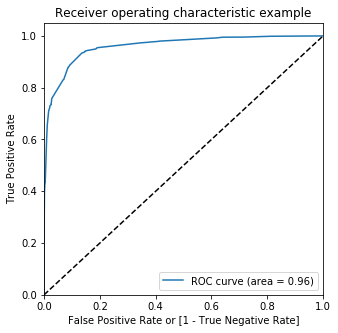

In [244]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [245]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.953959,95.0,1,1,1,1,1,1,1,1,1,1,1
1,0,0.001681,0.0,0,1,0,0,0,0,0,0,0,0,0
2,1,0.908035,91.0,1,1,1,1,1,1,1,1,1,1,1
3,1,0.993307,99.0,1,1,1,1,1,1,1,1,1,1,1
4,0,0.026000,3.0,0,1,0,0,0,0,0,0,0,0,0


In [246]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388053  1.000000  0.000000
0.1   0.1  0.778928  0.973333  0.655650
0.2   0.2  0.866573  0.949899  0.813733
0.3   0.3  0.891502  0.934141  0.864463
0.4   0.4  0.899969  0.878384  0.913656
0.5   0.5  0.891972  0.830707  0.930822
0.6   0.6  0.889464  0.760808  0.971048
0.7   0.7  0.881938  0.735758  0.974635
0.8   0.8  0.882251  0.729293  0.979247
0.9   0.9  0.859674  0.656566  0.988470


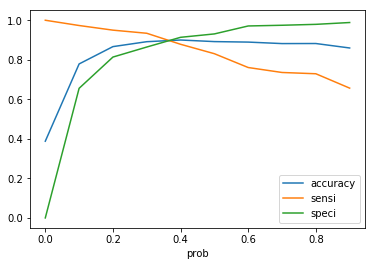

In [247]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above,the three curves are intersecting ~0.38 taking it as cutoff probability.

In [248]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.953959,95.0,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.001681,0.0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.908035,91.0,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.993307,99.0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.026000,3.0,0,1,0,0,0,0,0,0,0,0,0,0


In [249]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8999686422075885

In [250]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3545,  358],
       [ 280, 2195]], dtype=int64)

In [251]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [252]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8868686868686869

In [253]:
# Let us calculate specificity
TN / float(TN+FP)

0.9082756853702281

In [254]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09172431462977197


In [255]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8597728162945554


In [256]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9267973856209151


## Precision and Recall

In [257]:
#Looking at the confusion matrix again

In [258]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion )
confusion

array([[3633,  270],
       [ 419, 2056]], dtype=int64)

##### Precision
TP / TP + FP

In [259]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.883920894239037

##### Recall
TP / TP + FN

In [260]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8307070707070707

Using sklearn utilities for the same

In [261]:
from sklearn.metrics import precision_score, recall_score

In [262]:
precision_score

<function sklearn.metrics.classification.precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [263]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)

0.883920894239037

In [264]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)

0.8307070707070707

### Precision and recall tradeoff

In [265]:
from sklearn.metrics import precision_recall_curve

In [266]:
y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion

(0       1
 1       0
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       1
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      1
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 6348    1
 6349    1
 6350    0
 6351    1
 6352    0
 6353    0
 6354    0
 6355    1
 6356    0
 6357    1
 6358    1
 6359    0
 6360    0
 6361    0
 6362    1
 6363    0
 6364    1
 6365    0
 6366    0
 6367    1
 6368    1
 6369    0
 6370    0
 6371    0
 6372    0
 6373    0
 6374    1
 6375    0
 6376    0
 6377    0
 Name: Converted, Length: 6378, dtype: int64, 0       1
 1       0
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       1
 10      0
 11      0
 12      0
 13      0
 14      0
 15      1
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      

In [267]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

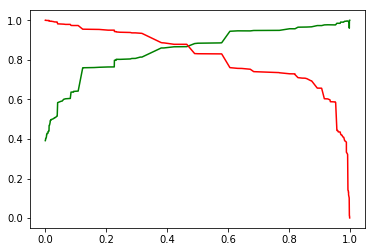

In [268]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [269]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [270]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tag,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
358,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1048,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7525,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1031,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4200,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [271]:
X_test_sm = sm.add_constant(X_test)

In [272]:
X_test.shape

(2734, 16)

Making predictions on the test set

In [273]:
y_test_pred = res.predict(X_test_sm)

In [274]:
y_test_pred[:10]

358     0.953959
1048    0.874908
7525    0.820156
1031    0.014136
4200    0.993307
5853    0.108165
7606    0.908035
5227    0.108165
4238    0.998482
8336    0.039330
dtype: float64

In [275]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [276]:
# Let's see the head
y_pred_1.head()

,0
358,0.953959
1048,0.874908
7525,0.820156
1031,0.014136
4200,0.993307


In [277]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [278]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [279]:
y_pred_final.head()

,Converted,0
358,1,0.953959
1048,1,0.874908
7525,1,0.820156
1031,0,0.014136
4200,1,0.993307


In [280]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [281]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
358,1,0.953959
1048,1,0.874908
7525,1,0.820156
1031,0,0.014136
4200,1,0.993307


In [282]:
y_pred_final['Predicted_Conversion'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [283]:
y_pred_final['Lead_Score'] =round(y_pred_final['Converted_Prob']*100)

In [284]:
y_pred_final.head()

,Converted,Converted_Prob,Predicted_Conversion,Lead_Score
358,1,0.953959,1,95.0
1048,1,0.874908,1,87.0
7525,1,0.820156,1,82.0
1031,0,0.014136,0,1.0
4200,1,0.993307,1,99.0


In [285]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted_Conversion)

0.901609363569861

In [286]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted_Conversion)
confusion2

array([[1562,  140],
       [ 129,  903]], dtype=int64)

In [287]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [288]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.875

In [289]:
# Let us calculate specificity
TN / float(TN+FP)

0.917743830787309

## Checking Conversion % 

Now we have to decide a cutoff score which company can employ to identify the hot leads. And in those identified Hot leads it can get conversion rate of minimum 80%.

Based on this model, cutoff score can be selected and conversion be calculated below-

Selecting that data and checking conversion rate-

**To calculate Conversion on the whole dataset, y_train_pred_final and from test- y_pred_final are concatenated to ceate master dataframe which contains Lead score for all the cleaned records. Cutoff Lead Score can be applied on this dataset and Conversion to 1 from all the records be calculated.**

In [290]:
y_train_pred_final.head(2)

,Converted,Converted_Prob,Lead_Score,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.953959,95.0,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.001681,0.0,0,1,0,0,0,0,0,0,0,0,0,0


In [291]:
df_train=y_train_pred_final[['Converted','Lead_Score','Predicted_Conversion']]

In [292]:
y_pred_final.head()

,Converted,Converted_Prob,Predicted_Conversion,Lead_Score
358,1,0.953959,1,95.0
1048,1,0.874908,1,87.0
7525,1,0.820156,1,82.0
1031,0,0.014136,0,1.0
4200,1,0.993307,1,99.0


In [293]:
df_test=y_pred_final[['Converted','Lead_Score','Predicted_Conversion']]

In [294]:
df_train.shape

(6378, 3)

In [295]:
df_test.shape

(2734, 3)

In [296]:
df=pd.concat([df_train,df_test])

In [297]:
df.shape

(9112, 3)

In [298]:
df.head()

,Converted,Lead_Score,Predicted_Conversion
0,1,95.0,1
1,0,0.0,0
2,1,91.0,1
3,1,99.0,1
4,0,3.0,0


**Various cutoff score numbers have been tried. At 30, desired Converison of >80% is obtained, hence cutoff Lead score is chosen as 30.**

In [299]:
df_optimal_conversion=df[df['Lead_Score']>=30]

In [300]:
df_optimal_conversion.shape

(4043, 3)

In [301]:
conversion_rate=round(100*(df_optimal_conversion['Converted'].sum()/len(df_optimal_conversion.index)))

In [302]:
conversion_rate

81.0

**Thus, the Lead_Score cutoff has been set at 30. Prospects above Lead Score of 30 are selected in final y dataset obtained from concatenating y train and y test. Conversion of 81% is achieved.Hence it is a good model with accuracy of 89.19% and Conversion rate of 81%. Thus X Education should try to reach only prospects with Lead score of >=30 to achieve >80% conversion rate.**